# Install Kaggle to import Dataset through Kaggle API

In [2]:
!pip install kaggle

!kaggle datasets download -d junnn0126/university-students-mental-health

from zipfile import ZipFile
dataset = 'university-students-mental-health.zip'  

with ZipFile(dataset, 'r') as zip:
    zip.extractall()

Dataset URL: https://www.kaggle.com/datasets/junnn0126/university-students-mental-health
License(s): CC0-1.0
university-students-mental-health.zip: Skipping, found more recently modified local copy (use --force to force download)


# Import Libraries and Data

In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold, train_test_split, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [119]:
# Import dataset
df = pd.read_csv('mentalhealth_dataset.csv')

## Information of Dataset and Summary 

In [122]:
# Obtaining brief overview of what dataset looks like by checking first five rows of the data.

df.head()

,Timestamp,Gender,Age,Course,YearOfStudy,CGPA,Depression,Anxiety,PanicAttack,SpecialistTreatment,SymptomFrequency_Last7Days,HasMentalHealthSupport,SleepQuality,StudyStressLevel,StudyHoursPerWeek,AcademicEngagement
0,13/7/2020,Female,24,Biotechnology,Year 3,2.38,1,0,0,0,5,0,4,5,8,2
1,13/7/2020,Female,18,Biotechnology,Year 3,4.00,0,1,0,0,0,0,4,4,13,5
2,13/7/2020,Female,25,Biotechnology,Year 3,3.68,0,0,1,0,3,0,1,2,13,1
3,13/7/2020,Female,18,Engineering,year 4,4.00,0,0,0,0,3,0,5,1,19,2
4,13/7/2020,Female,20,Engineering,year 4,2.00,1,1,0,0,0,0,2,4,3,2


In [124]:
#Observe the size of the dataset, as well as number of features taken.

df.shape

(1000, 16)

In [126]:
# Obtain basic info about the dataset (number of null values and data types of each feature)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Timestamp                   1000 non-null   object 
 1   Gender                      1000 non-null   object 
 2   Age                         1000 non-null   int64  
 3   Course                      1000 non-null   object 
 4   YearOfStudy                 1000 non-null   object 
 5   CGPA                        1000 non-null   float64
 6   Depression                  1000 non-null   int64  
 7   Anxiety                     1000 non-null   int64  
 8   PanicAttack                 1000 non-null   int64  
 9   SpecialistTreatment         1000 non-null   int64  
 10  SymptomFrequency_Last7Days  1000 non-null   int64  
 11  HasMentalHealthSupport      1000 non-null   int64  
 12  SleepQuality                1000 non-null   int64  
 13  StudyStressLevel            1000 n

In [128]:
df.describe(include='all')

,Timestamp,Gender,Age,Course,YearOfStudy,CGPA,Depression,Anxiety,PanicAttack,SpecialistTreatment,SymptomFrequency_Last7Days,HasMentalHealthSupport,SleepQuality,StudyStressLevel,StudyHoursPerWeek,AcademicEngagement
count,1000,1000,1000.000000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
unique,16,2,NaN,49,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2021-07-08,Female,NaN,Engineering,year 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,190,760,NaN,180,390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,21.402000,NaN,NaN,3.122530,0.483000,0.474000,0.458000,0.067000,3.4980,0.067000,2.983000,3.045000,9.746000,3.055000
std,NaN,NaN,2.373611,NaN,NaN,0.810961,0.499961,0.499573,0.498482,0.250147,2.3081,0.250147,1.417999,1.417386,5.651497,1.422673
min,NaN,NaN,18.000000,NaN,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,NaN,NaN,19.000000,NaN,NaN,2.250000,0.000000,0.000000,0.000000,0.000000,1.7500,0.000000,2.000000,2.000000,5.000000,2.000000
50%,NaN,NaN,21.000000,NaN,NaN,3.250000,0.000000,0.000000,0.000000,0.000000,3.0000,0.000000,3.000000,3.000000,9.000000,3.000000
75%,NaN,NaN,24.000000,NaN,NaN,4.000000,1.000000,1.000000,1.000000,0.000000,6.0000,0.000000,4.000000,4.000000,15.000000,4.000000


# Data Cleaning

## Check for missing/null values:

In [132]:
# Check for any missing values withint the dataset.

df.isna().sum()

Timestamp                     0
Gender                        0
Age                           0
Course                        0
YearOfStudy                   0
CGPA                          0
Depression                    0
Anxiety                       0
PanicAttack                   0
SpecialistTreatment           0
SymptomFrequency_Last7Days    0
HasMentalHealthSupport        0
SleepQuality                  0
StudyStressLevel              0
StudyHoursPerWeek             0
AcademicEngagement            0
dtype: int64

In [134]:
# Check for any missing values withint the dataset.

df.isnull().sum()

Timestamp                     0
Gender                        0
Age                           0
Course                        0
YearOfStudy                   0
CGPA                          0
Depression                    0
Anxiety                       0
PanicAttack                   0
SpecialistTreatment           0
SymptomFrequency_Last7Days    0
HasMentalHealthSupport        0
SleepQuality                  0
StudyStressLevel              0
StudyHoursPerWeek             0
AcademicEngagement            0
dtype: int64

Since there are no missing values or null values to replace, we can inspect each individual feature more closely

## Standardizing 'Course' Feature:

In [139]:
#Obtain number of unique values in the 'Course' column.

df['Course'].nunique()

print(f"The number of unique courses before standardizing is {df['Course'].nunique()}.")

The number of unique courses before standardizing is 49.


In [141]:
df['Course'].value_counts()

Course
Engineering                180
BCS                        177
BIT                        101
KOE                         39
Biomedical science          33
Engine                      19
Laws                        19
psychology                  17
BENL                        16
CTS                         15
Business Administration     14
Koe                         14
engin                       14
Human Sciences              13
Nursing                     13
Law                         13
Communication               13
Marine science              12
Psychology                  12
Kirkhs                      12
Malcom                      12
Pendidikan Islam            12
Accounting                  11
DIPLOMA TESL                11
Usuluddin                   11
Fiqh                        11
KIRKHS                      10
Irkhs                       10
Pendidikan islam            10
ENM                          9
Human Resources              9
Mathemathics                 9
F

Now this is an interesting feature as a lot of these are the same course, just spelt differently. We can group some of these values up to present them nicely.

### For reference:
- **BCS** (Bachelor of Computer Science) mapped to `'bcs'`
- **BIT** (Bachelor of IT) mapped to `'bit'`
- **KOE** (Kulliyah of Engineering) mapped to `'engineering'`
- **BENL** (Bachelor of Human Sciences - English Language & Literature) mapped to `'benl'`
- **CTS** (Computational and Theoretical Sciences) mapped to `'cts'`
- **KIRKHS** (Kulliyyah of Islamic Revealed Knowledge and Human Sciences) mapped to `'kirkhs'`
- **IRKHS** (Islamic Revealed Knowledge and Heritage) mapped to `'kirkhs'`
- **ENM** (Engineering Mathematics) mapped to `'math'`
- **Malcom** (Malaysian Communications) mapped to `'comms'`
- **DIPLOMA TESL** (Diploma in Teaching English as Second Language) mapped to `'languageTeaching'`
- **TAASL** (Teaching Arabic as Second Language) mapped to `'languageTeaching'`
- **KOP** (Kulliyyah of Pharmacy) mapped to `'pharmacy'`
- **KENMS** (Kulliyyah of Economics and Management Sciences) mapped to `'econs'`
- **MHSC** (Master of Health Sciences) mapped to `'mhsc'`
- **Engine** mapped to `'engineering'`

In [144]:
# Create new and stardardized labels to remove repetitive features.

mapped_features = {
    'Engineering': 'engineering',
    'BCS': 'bcs',
    'BIT' : 'bit',
    'KOE' : 'engineering',
    'Biomedical science' : 'bioMed',
    'Engine' : 'engineering',
    'Laws' : 'law',
    'psychology' : 'psych',
    'BENL' : 'benl',
    'CTS' : 'cts',
    'Business Administration' : 'ba',
    'Koe' : 'engineering',
    'engin' : 'engineering',
    'Human Sciences' : 'kirkhs',
    'Nursing' : 'nursing',
    'Law' : 'law',
    'Communication' : 'comms',
    'Marine science' : 'marineSci',
    'Psychology' : 'psych',
    'Kirkhs' : 'kirkhs',
    'Malcom' : 'comms',
    'Pendidikan Islam' : 'islamicStudies',
    'Accounting' : 'accounting',
    'DIPLOMA TESL' : 'languageTeaching',
    'Usuluddin' : 'islamicStudies',
    'Fiqh' : 'islamicStudies',
    'KIRKHS' : 'kirkhs',
    'Irkhs' : 'kirkhs',
    'Pendidikan islam' : 'islamicStudies',
    'ENM' : 'math',
    'Human Resources' : 'hr',
    'Mathemathics' : 'math',
    'Fiqh fatwa' : 'islamicStudies',
    'TAASL' : 'languageTeaching',
    'Radiography' : 'radiography',
    'Islamic education' : 'islamicStudies',
    'Econs' : 'econs',
    'Kop' : 'pharmacy',
    'Benl' : 'benl',
    'Biotechnology' : 'bioTech',
    'koe' : 'engineering',
    'Diploma Nursing' : 'nursing',
    'IT' : 'bit',
    'KENMS' : 'econs',
    'Pendidikan Islam' : 'islamicStudies',
    'Banking Studies' : 'banking',
    'MHSC' : 'mhsc',
    'ALA' : 'ala',
    'Islamic Education' : 'islamicStudies'
}

# Map features to dataframe
df['Course'] = df['Course'].astype(str).str.strip().replace(mapped_features)

In [22]:
print(f"The number of unique values is now {df['Course'].nunique()}.\n")
df['Course'].value_counts()

The number of unique values is now 25.



Course
engineering         274
bcs                 177
bit                 109
islamicStudies       74
kirkhs               45
bioMed               33
law                  32
psych                29
comms                25
benl                 24
nursing              21
languageTeaching     20
math                 18
cts                  15
econs                15
ba                   14
marineSci            12
accounting           11
radiography           9
hr                    9
pharmacy              8
bioTech               8
mhsc                  6
banking               6
ala                   6
Name: count, dtype: int64

As you can see, we were able to remove 24 labels from the dataset to reduce the number of unique labels down to 25. Standardizing and removing the redundant and repetitive values are crucial to get a clearer and more accurate representation of the data.

## Standardizing 'YearOfStudy' Feature:

In [146]:
print(df['YearOfStudy'].value_counts())
print(f"\nThe number of unique values before standardizing is {df['YearOfStudy'].nunique()}.")

YearOfStudy
year 1    390
Year 3    185
Year 2    178
year 2     96
year 4     74
year 3     55
Year 1     22
Name: count, dtype: int64

The number of unique values before standardizing is 7.


Similar to `'Course'`, `'YearOfStudy'` also has repetitive features that we can group together. We can standardize them into integer values based on the Year of Study instead of string values for easier intepretation.

In [149]:
df['YearOfStudy'] = df['YearOfStudy'].astype('str').str.strip('').map({'year 1':'1',
                                                                   'Year 1':'1',
                                                                   'year 2':'2',
                                                                   'Year 2':'2',
                                                                   'year 3':'3',
                                                                   'Year 3':'3',
                                                                   'year 4':'4'})

In [151]:
df['YearOfStudy'] = df['YearOfStudy'].astype('int64')

In [153]:
df['YearOfStudy'].value_counts()

YearOfStudy
1    412
2    274
3    240
4     74
Name: count, dtype: int64

## Standardizing 'CGPA' Feature:

The CGPA from the dataset is presented in continuous form. Therefore, we will create a new feature and categorise it into defined ranges for ease of interpretability in later analysis.

In [157]:
bins = [0, 2.5, 3.0, 3.5, 4.0]
labels = ['0 - 2.5', '2.5 - 3.0', '3.0 - 3.5', '3.5 - 4.0']

df['CGPA_Range'] = pd.cut(df['CGPA'], bins=bins, labels=labels, include_lowest=True)
df['CGPA_Range'] = df['CGPA_Range'].astype('object')
df[['CGPA', 'CGPA_Range']].head()

,CGPA,CGPA_Range
0,2.38,0 - 2.5
1,4.00,3.5 - 4.0
2,3.68,3.5 - 4.0
3,4.00,3.5 - 4.0
4,2.00,0 - 2.5


In [159]:
df['CGPA_Range'].value_counts()

CGPA_Range
3.5 - 4.0    437
0 - 2.5      317
2.5 - 3.0    130
3.0 - 3.5    116
Name: count, dtype: int64

## Check data types:

In [166]:
for col in ['Depression', 'Anxiety', 'PanicAttack']:
    df[col] = df[col].astype(str).str.strip().map({'1': 1, '0': 0})

In [168]:
df.dtypes

Timestamp                      object
Gender                         object
Age                             int64
Course                         object
YearOfStudy                     int64
CGPA                          float64
Depression                      int64
Anxiety                         int64
PanicAttack                     int64
SpecialistTreatment             int64
SymptomFrequency_Last7Days      int64
HasMentalHealthSupport          int64
SleepQuality                    int64
StudyStressLevel                int64
StudyHoursPerWeek               int64
AcademicEngagement              int64
CGPA_Range                     object
dtype: object

## Remove Redundant Feature

In [171]:
features = ['SpecialistTreatment','HasMentalHealthSupport']
for feature in features:
    print(df[feature].value_counts())

SpecialistTreatment
0    933
1     67
Name: count, dtype: int64
HasMentalHealthSupport
0    933
1     67
Name: count, dtype: int64


In [173]:
df = df.drop('SpecialistTreatment', axis=1)

As observed above, the features `SpecialistTreatment` and `HasMentalHealthSupport` both contain the exact same proportion. To reduce multicollinearity and to simplify the model, `SpecialistTreatment` will be dropped.

In [176]:
df = df.drop('Timestamp', axis=1)

`Timestamp` is also dropped as it is not needed for this analysis.

# Exploratory Data Analysis (EDA)

## Univariate Analysis

### Distribution of Students based on Gender:

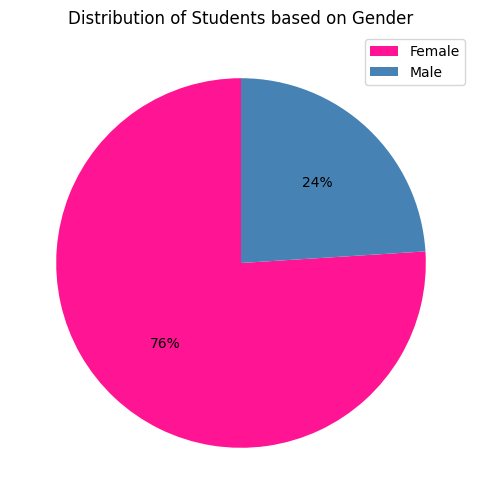

In [178]:
plt.figure(figsize=(15,6))
plt.pie(df['Gender'].value_counts(), startangle=90, autopct='%1.f%%', colors =['deeppink','steelblue'])
plt.title('Distribution of Students based on Gender')
plt.legend(labels=['Female','Male'])

As we can see, the dataset shows a significant class imbalance in gender representation, with approximaterly 75% of the survey was done by female participants, while male participants only account for 25%.

### Distribution of Students based on Age:

In [182]:
df['Age'].value_counts().sort_values()

Age
22     93
25    118
21    118
19    119
20    120
23    135
24    136
18    161
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Students based on Age')

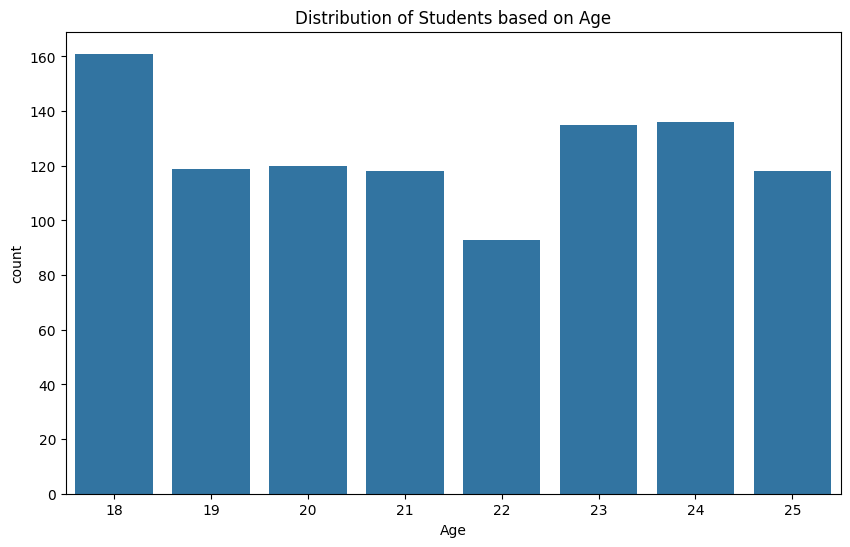

In [184]:
plt.figure(figsize=(10,6))
sns.barplot(df['Age'].value_counts())
plt.title('Distribution of Students based on Age')

### Distribution of Courses taken by Students

Text(0.5, 1.0, 'Distribution by Courses Taken by Students')

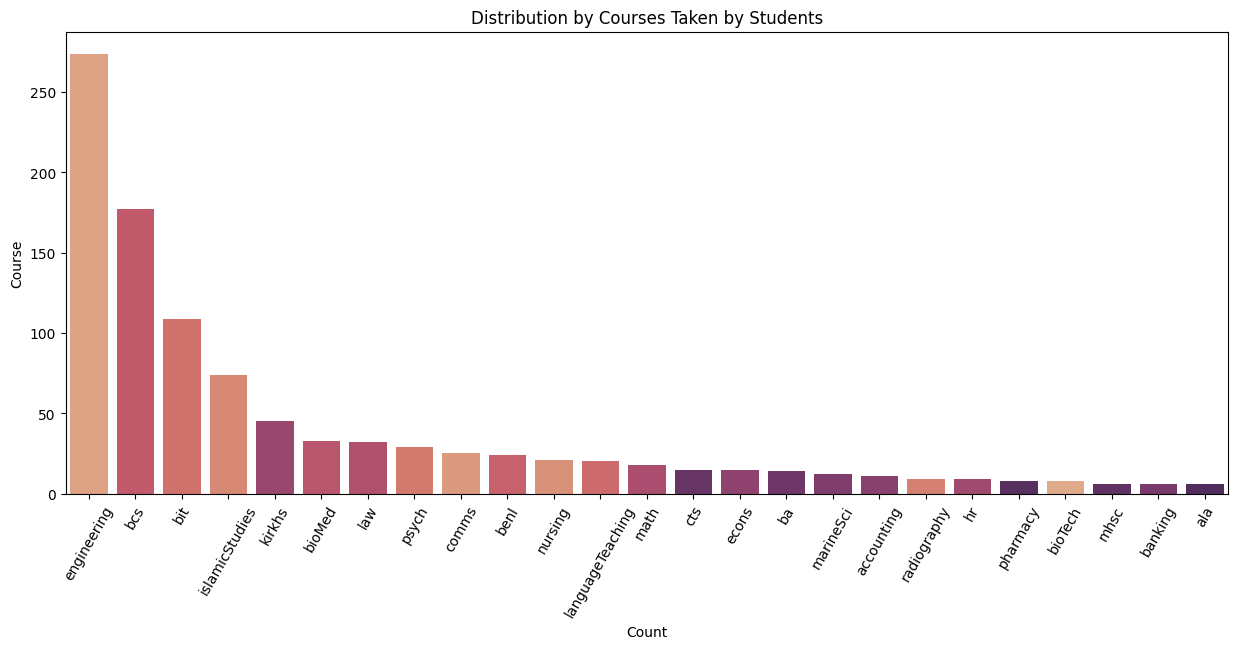

In [187]:
plt.figure(figsize=(15,6))
sns.countplot(x=df['Course'], order=df['Course'].value_counts().index, palette='flare', hue=df['Course'], legend=False, dodge=False)
plt.xlabel('Count')
plt.ylabel('Course')
plt.xticks(rotation=60)
plt.title('Distribution by Courses Taken by Students')

- The majority of the students taking part in this study comes from STEM courses (Engineering, Bachelor of Science, Bachelor of IT), this could be due to the nature of the university where the study was conducted. The university could be more well known for they're STEM courses, and not so much their business courses (Human Resources, Banking, Accounting).
- Furthermore, a huge majority of the students in the study also come from courses related to Islamic Studies, leading to the assumption that majority of the students in the study are of Muslim religion.

### Distribution of Students based on Year of Study:

Text(0.5, 1.0, 'Distribution by Year of Study of Students')

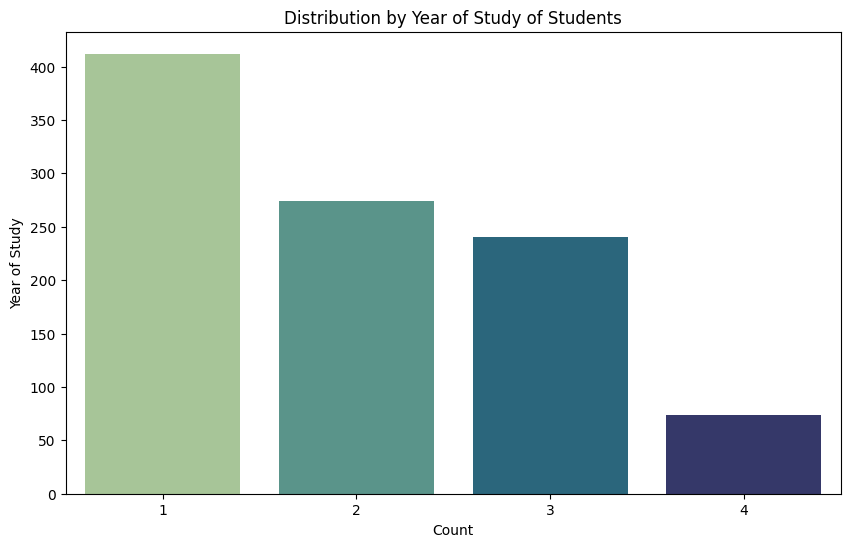

In [191]:
plt.figure(figsize=(10,6))
sns.countplot(x = df['YearOfStudy'],
              hue = df['YearOfStudy'],
              order = df['YearOfStudy'].value_counts().index,
              legend=False,
              palette='crest'
             )
plt.xlabel('Count')
plt.ylabel('Year of Study')
plt.title('Distribution by Year of Study of Students')

There is a downward trend of the proportion of students with their Year of Study. Students who are further into their study would often dedicate more time into their academics, and would less likely be aware of the existence of this study. Furthermore, most courses only require three years of study, this could be a factor in the low number of Year 4 students.

### Distribution of Students based on CGPA:

In [195]:
df['CGPA'].describe()

count    1000.000000
mean        3.122530
std         0.810961
min         2.000000
25%         2.250000
50%         3.250000
75%         4.000000
max         4.000000
Name: CGPA, dtype: float64

Text(0.5, 1.0, 'Distribution of Students by CGPA')

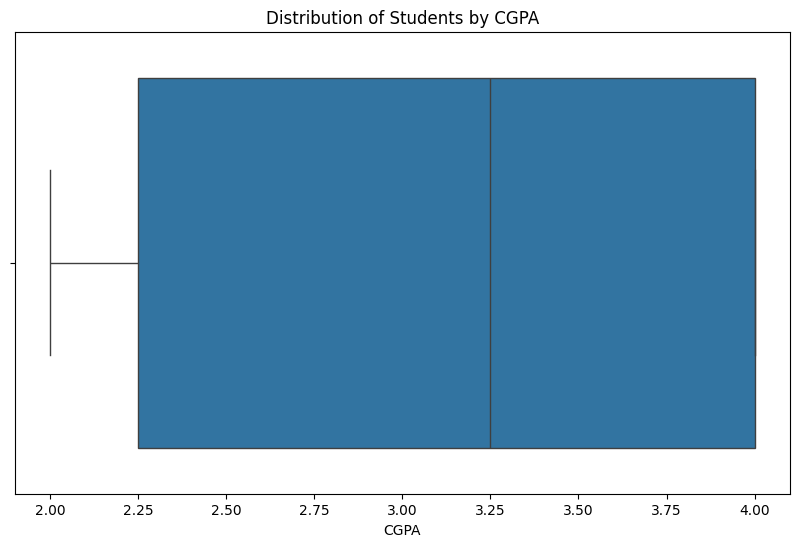

In [197]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='CGPA', legend=False)
plt.title('Distribution of Students by CGPA')

From the boxplot, we can gather that:
- Majority of students have a CGPA of more than 2.25; with a median value of 3.25.
- The distribution seems right-skewed, where most students tend to score higher CGPAs closer to 4.0.
- No clear outliers can be identified, the distribution lies within the expected range.
- The lower whisker extends to a CGPA of 2.00, indicating only a smaller percentage of underperforming students.

### Mental Health Features: Depression, Anxiety, PanicAttack

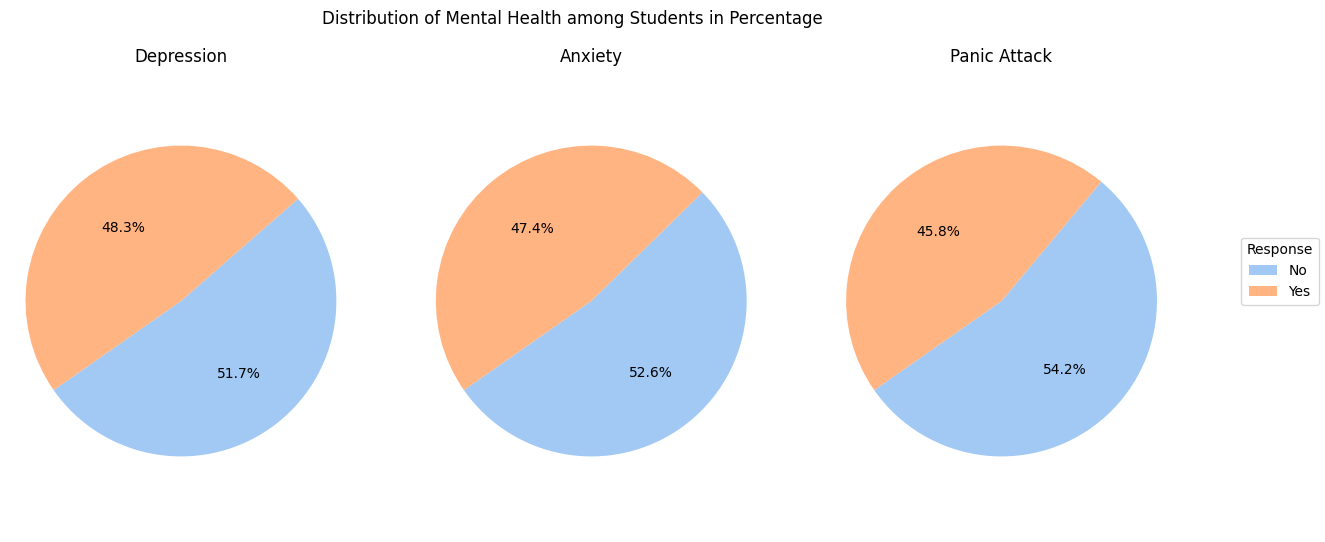

In [201]:
fig, axs = plt.subplots(1, 3, figsize=(15,6))
fig.suptitle('Distribution of Mental Health among Students in Percentage')
labels = ['No','Yes']
colors = sns.color_palette("pastel")

axs[0].pie(df['Depression'].value_counts(), startangle=215, autopct='%1.1f%%', colors = colors)
axs[0].set_title('Depression')
axs[0].axis('equal')

axs[1].pie(df['Anxiety'].value_counts(),  startangle=215, autopct='%1.1f%%', colors = colors)
axs[1].set_title('Anxiety')
axs[1].axis('equal')

axs[2].pie(df['PanicAttack'].value_counts(), startangle=215, autopct='%1.1f%%', colors = colors)
axs[2].set_title('Panic Attack')
axs[2].axis('equal')

fig.legend(labels, loc='center right', title='Response')

This suggests that in our dataset, the classes are rather balanced with around
- 48.3% of students reported having *Depression*, while 51.7% of students do not.
- 47.4% of students reported having *Anxiety*, while 52.6% of students do not.
- 45.8% of students reported having *Panic Attacks*, while 54.2% of students do not.

### Presence of Symptomps in the Last 7 Days

Text(0, 0.5, 'Count')

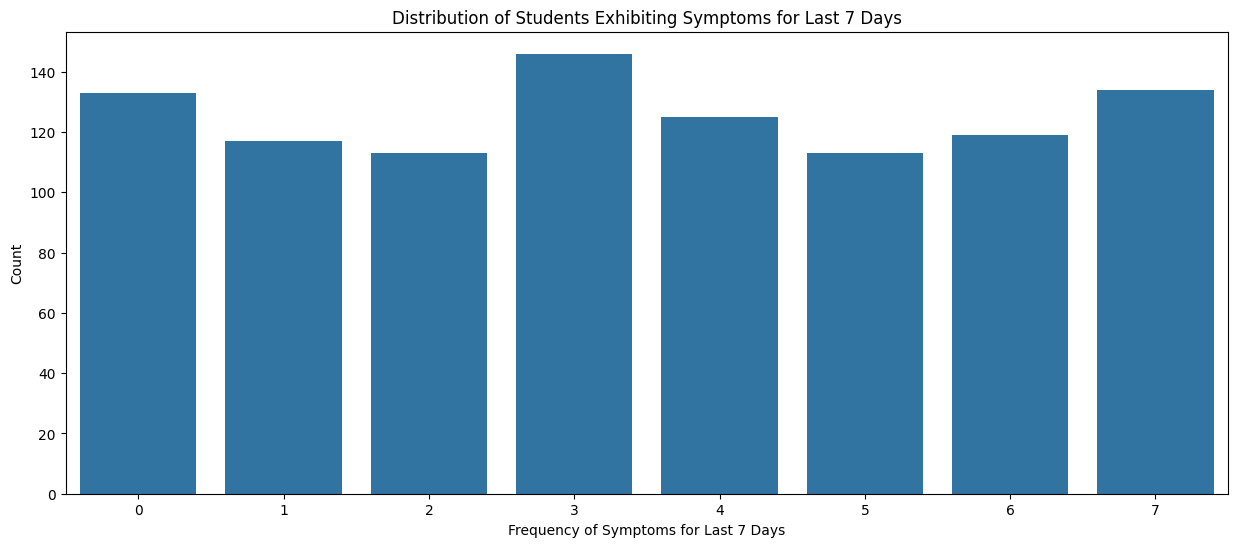

In [205]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='SymptomFrequency_Last7Days')
plt.title('Distribution of Students Exhibiting Symptoms for Last 7 Days')
plt.xlabel('Frequency of Symptoms for Last 7 Days')
plt.ylabel('Count')

A majority of the students reported experiencing symptomps for 3 times during the last 7 days from the day of the survey.

### Presence of Mental Health Support in Students

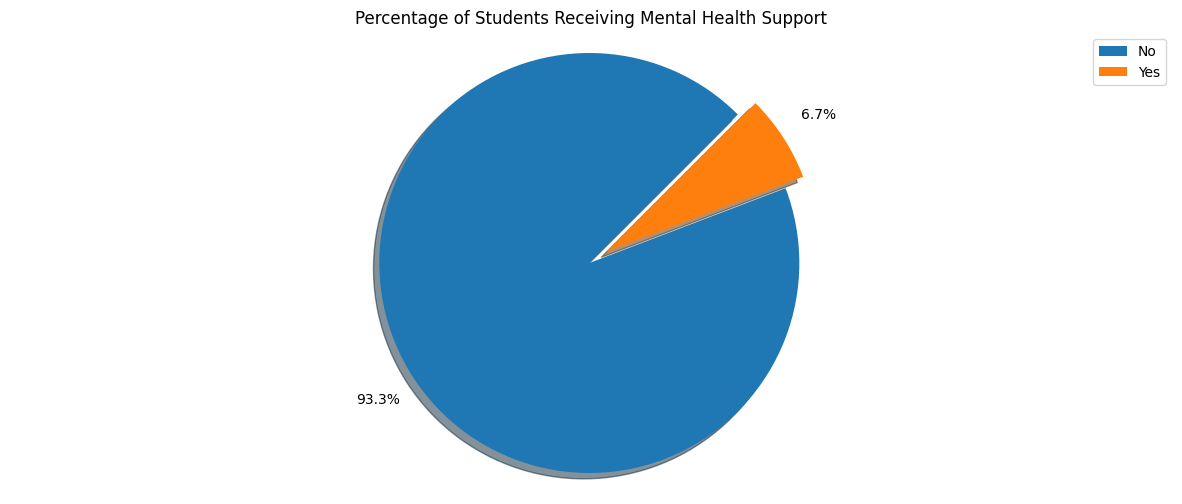

In [209]:
plt.figure(figsize=(15,6))
plt.pie(x=df['HasMentalHealthSupport'].value_counts(), data=df, explode=[0,0.1], startangle=45, autopct='%1.1f%%', pctdistance=1.2, shadow=True)
plt.axis('equal')
plt.legend(labels=['No','Yes'])
plt.title('Percentage of Students Receiving Mental Health Support')
plt.show()

As observed, only a handful of students (around 6.7%) who, may or may not struggle with mental health receive proper support, while the majority do not (around 93.3%). 

### Environment

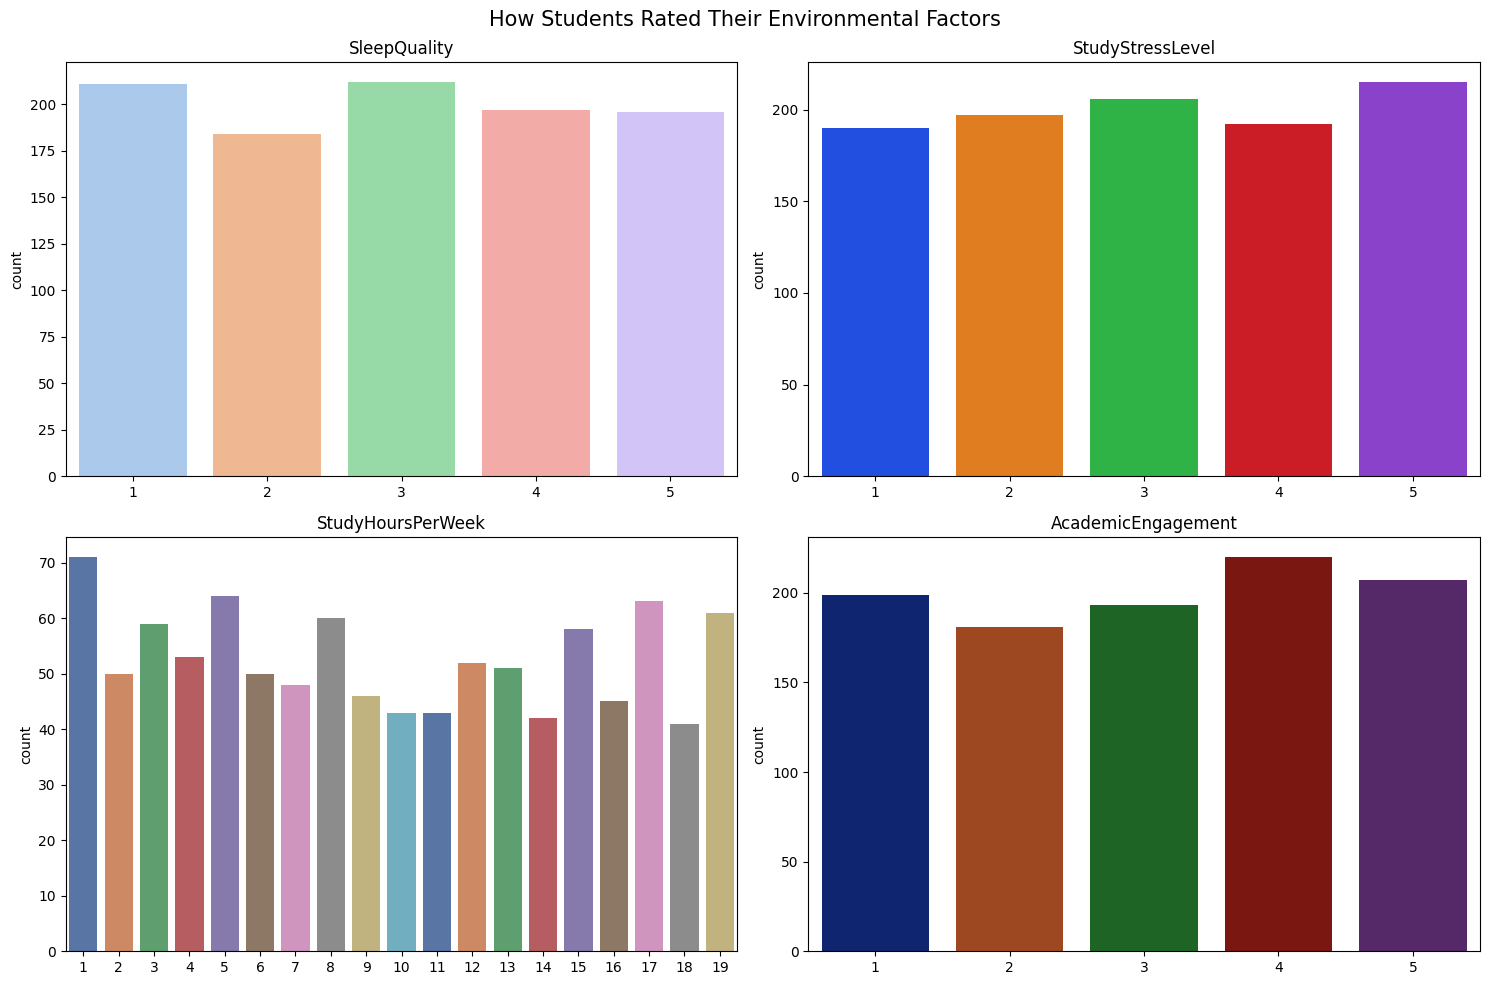

In [211]:
fig, axs = plt.subplots(2,2, figsize=(15,10))
fig.suptitle('How Students Rated Their Environmental Factors', fontsize=15)

sns.countplot(data=df, x='SleepQuality', hue='SleepQuality', ax=axs.flat[0], palette='pastel', legend=False)
axs.flat[0].set_title('SleepQuality', fontsize=12)
axs.flat[0].set_xlabel('')

sns.countplot(data=df, x='StudyStressLevel', hue='StudyStressLevel', ax=axs.flat[1], palette='bright', legend=False)
axs.flat[1].set_title('StudyStressLevel', fontsize=12)
axs.flat[1].set_xlabel('')

sns.countplot(data=df, x='StudyHoursPerWeek', hue='StudyHoursPerWeek', ax=axs.flat[2], palette='deep', legend=False)
axs.flat[2].set_title('StudyHoursPerWeek', fontsize=12)
axs.flat[2].set_xlabel('')

sns.countplot(data=df, x='AcademicEngagement', hue='AcademicEngagement', ax=axs.flat[3], palette='dark', legend=False)
axs.flat[3].set_title('AcademicEngagement', fontsize=12)
axs.flat[3].set_xlabel('')


plt.tight_layout()

Based on the graphs generated above, the following insights can be made:
- **Sleep Quality**: The distribution is rather balanced with a slight peak at 3, which indicates that many students rate their sleep as moderate quality.
- **Study Stress Level**: A majority of the students report experiencing very high study stress levels of 5, likely due to pressures from academic performances.
- **Study Hours per Week**: Suprisingly, the majority of students reported studying only 1 hour per week, which suggests either minimal academic engagement or underreporting of study hours.
- **Academic Engagement**: Most of the students rate their level of academic engagement as a 4, showing a general positive attitude in academics, despite the low amount of study hours.

## Multivariate Analysis: 

### To study the relationship between:
- Gender - CGPA
- Number of Students - Course (Gender)
- Number of Studetns - Course (Year of Study)
- Year of Study - Depression (Gender)
- Year of Study - Anxiety (Gender)
- Year of Study - Panic Attack (Gender)
- CGPA - Depression (Gender)
- CGPA - Anxiety (Gender)
- CGPA - Panic Attack (Gender)
- Course - Depression (Gender)
- Course - Anxiety (Gender)
- Course - Panic Attack (Gender)

### Distribution of Students based on Gender and CGPA:

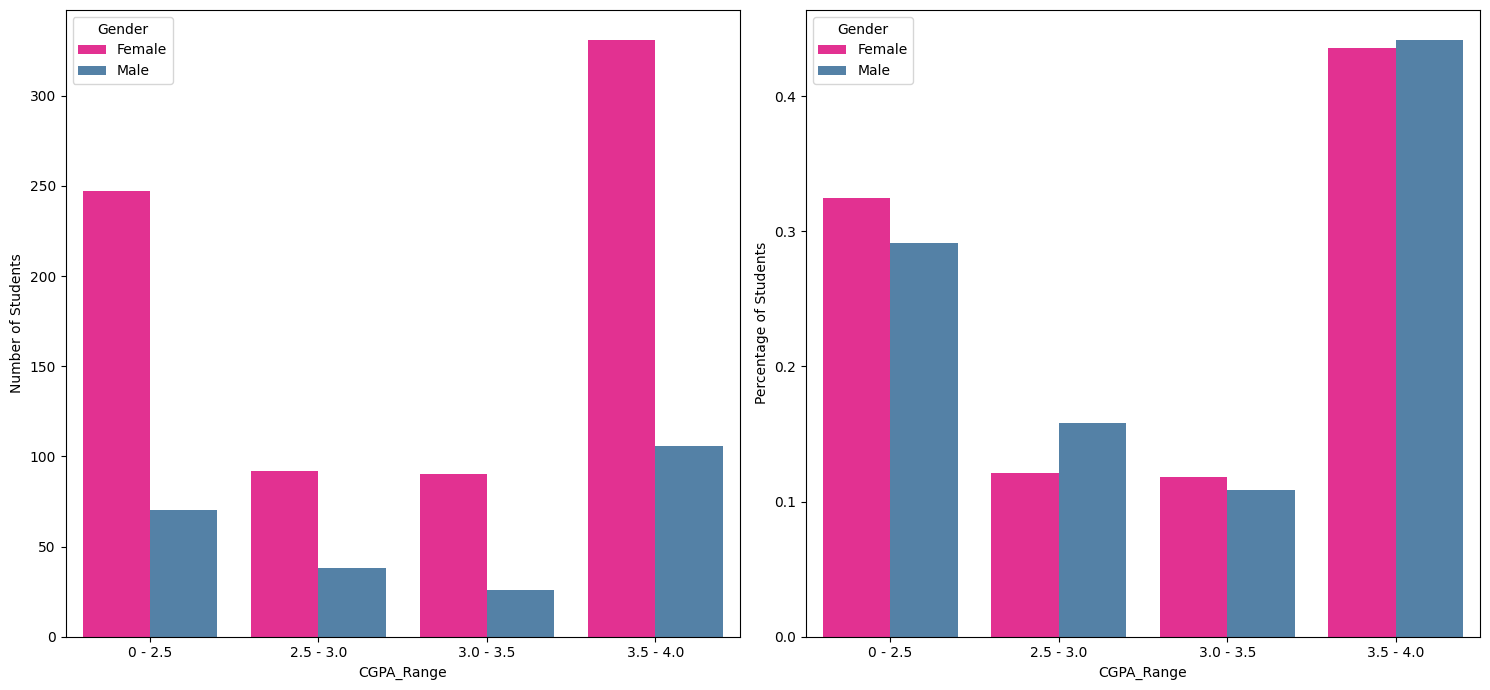

In [213]:
fig, axes = plt.subplots(1,2, figsize=(15,7))

sns.countplot(ax=axes[0], data=df, x='CGPA_Range', hue='Gender', palette=['deeppink','steelblue'], order=['0 - 2.5', '2.5 - 3.0', '3.0 - 3.5', '3.5 - 4.0'])
axes[0].set_ylabel('Number of Students')

#Create percentage of gender for each CGPA
grouped = df.groupby('Gender')['CGPA_Range']
grouped = grouped.value_counts(normalize=True).rename('Percentage').reset_index()

sns.barplot(ax=axes[1], data=grouped, x='CGPA_Range', y='Percentage', hue='Gender', order=['0 - 2.5', '2.5 - 3.0', '3.0 - 3.5', '3.5 - 4.0'], palette=['deeppink','steelblue'])
axes[1].set_ylabel('Percentage of Students')
plt.tight_layout()

- The highest proportion of students who took part in the study belong in the CGPA 3.5 to CGPA 4.0 range, showing academic excellence among majority of both male and female students.
- In each of the CGPA ranges, both female and male students remains relatively balanced, indicating neither gender performs particularly well against one another.

### Distribution of Students based on Gender and Course:

Text(0.5, 1.0, 'Distribution of Students from each course based on gender')

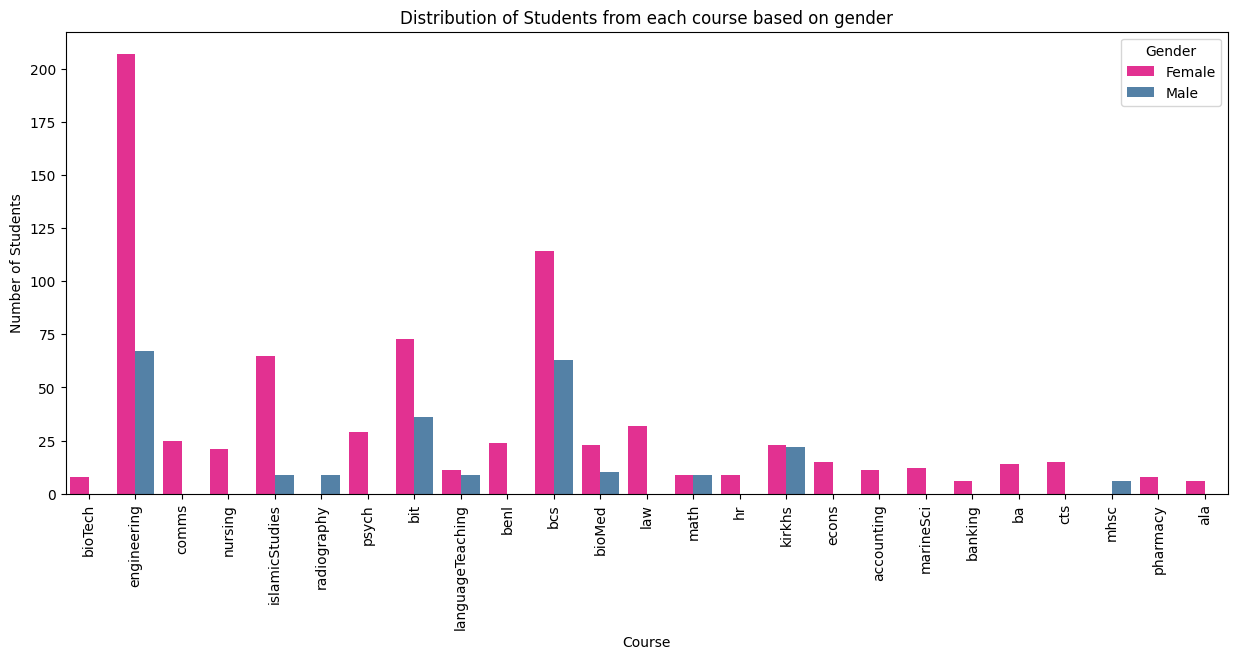

In [215]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='Course', hue='Gender', palette=['deeppink', 'steelblue'])
plt.xticks(rotation=90)
plt.ylabel('Number of Students')
plt.title('Distribution of Students from each course based on gender')

- As discussed previously, the study has already shown a clear class imbalance between male and female students with a significantly higher amount of female proportions in the dataset.
- Some courses even have zero male students participating in the study (BioTech, Communication, Nursing, Accounting, Marine Science, etc...), which limits the ability to draw gender-based comparisons in the study.
- On the other hand, there is one course that only draws data from male students which is MHSC, which also limits the data to only one gender.

### Distribution of Students based on Courses and Year of Study

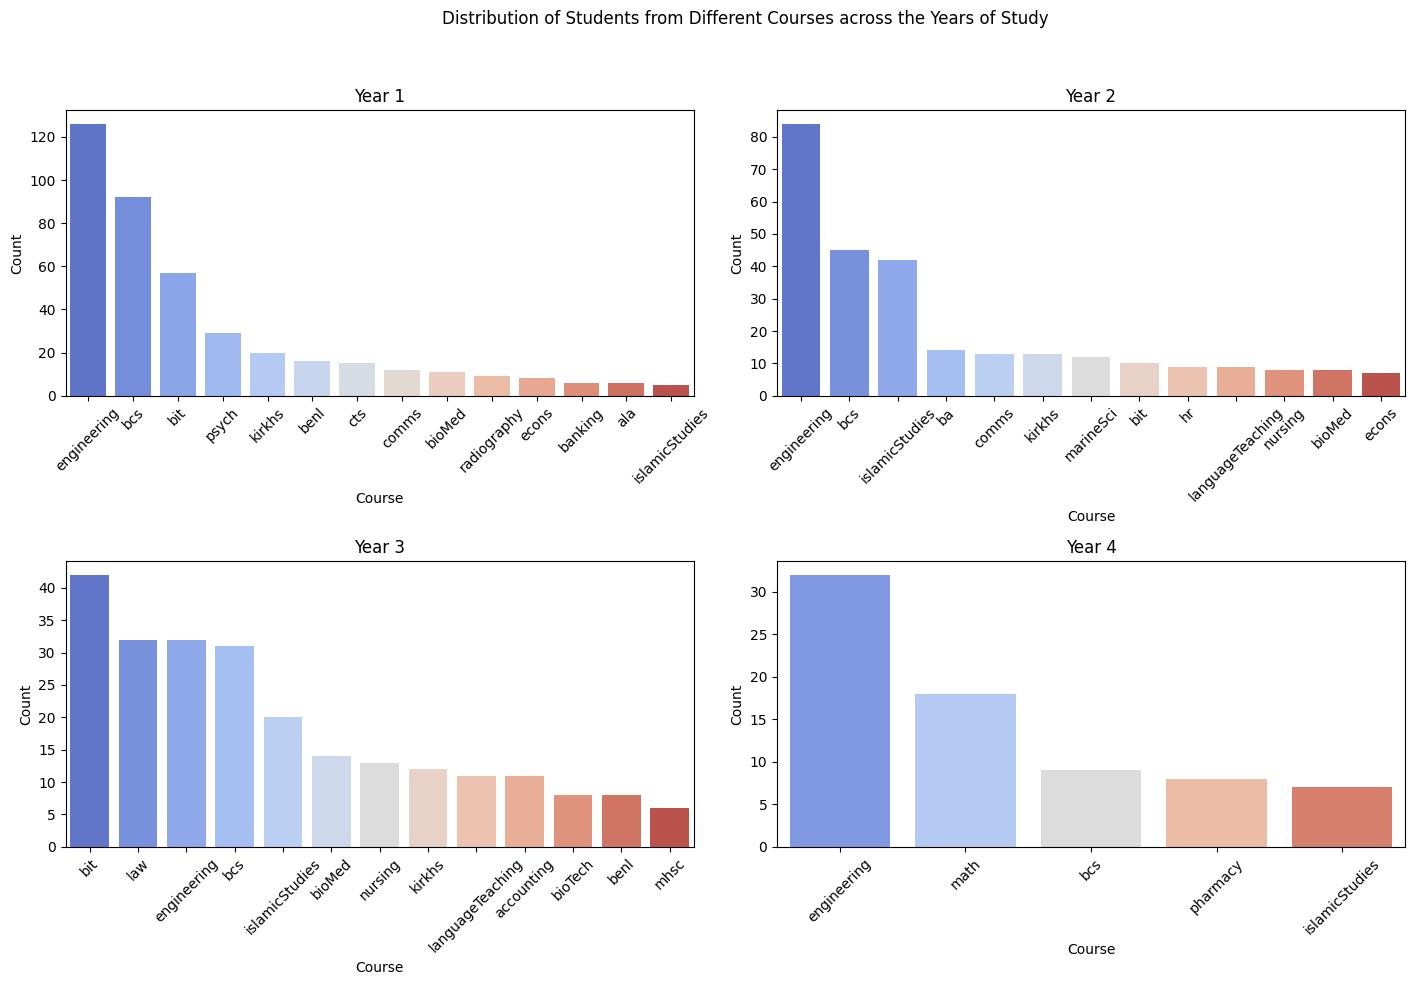

In [217]:
fig, axs = plt.subplots(2,2, figsize=(15,10))
fig.suptitle('Distribution of Students from Different Courses across the Years of Study')

years = [1, 2, 3, 4]
axs = axs.flatten()

for i, year in enumerate(years):
    year_data = df[df['YearOfStudy'] == year]['Course'].value_counts().reset_index()
    year_data.columns = ['Course', 'Count']
    sns.barplot(x='Course', hue='Course', y='Count', data=year_data, ax=axs[i], palette = 'coolwarm')
    axs[i].set_title(f'Year {year}')
    axs[i].tick_params(axis='x', rotation=45)

fig.tight_layout(rect=[0, 0, 0.95, 0.95])


- Year 1 students are predominately enrolled in engineering, followed by computer science (BCS), then IT. There is a wide diversity in courses in this year.
- In Year 2, engineering students continue to dominate, and fewer students are seen in niche programmes like lanauge teaching and marine science.
- Year 3 displays a more even distribution among law, engineering and computer science students; suggesting either increased transfers or higher enrolment in profesional fields.
- Year 4 has noticeable fewer students across all course, with engineering still leading. This could be due to higher rate of dropouts, longer programs, or transfering to other universities.

### Mental Health Distribution Based on Year of Study and Gender

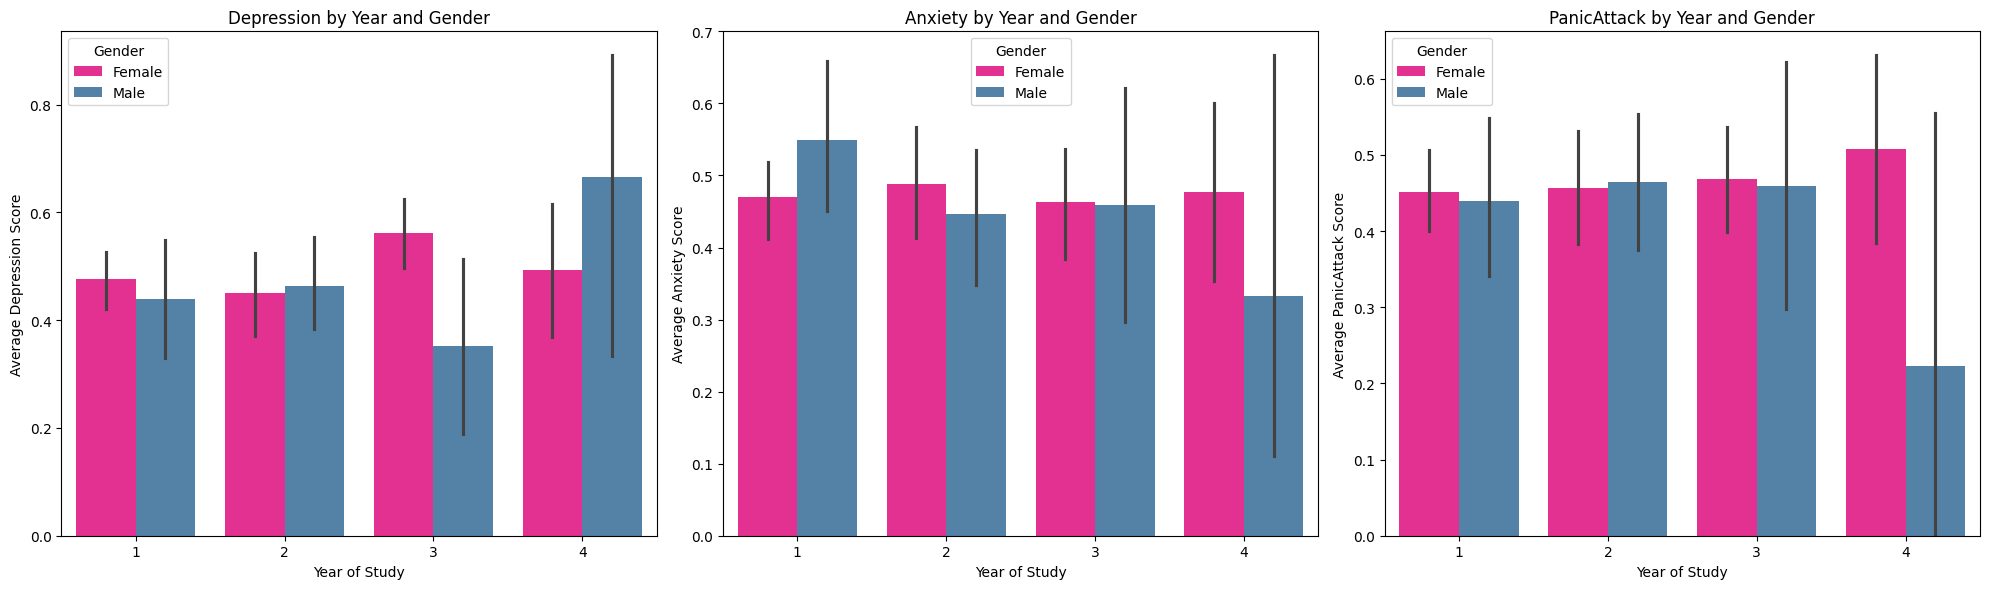

In [219]:
fig, axes = plt.subplots(1,3, figsize=(20,6))

mental_health_features = ['Depression','Anxiety','PanicAttack']
colors = ['deeppink','steelblue']
for i, feature in enumerate(mental_health_features):
    sns.barplot(ax=axes[i], x = 'YearOfStudy', y = feature, hue='Gender', data=df, palette=colors)
    axes[i].set_title(f'{feature} by Year and Gender')
    axes[i].set_xlabel('Year of Study')
    axes[i].set_ylabel(f'Average {feature} Score')
    plt.tight_layout()

Based on the graphs generated above, the following insights can be made based on the Year of Study and Gender distribution of the students:

**Depression Trends**: 
- The distribution of students experiencing depression is rather balanced for Year 1 and Year 2 students between females and males.
- There is a slight increase in female students experiencing depression in Year 3 while the number of male students experiencing depression reduced.
- In Year 4, there is a notable jump in depression scores for male students, possibly due to academic pressure and stress.


**Anxiety Trends**: 
- The distribution of female students experiencing anxiety have remained stable or consistent throughout the years.
- Anxiety appears to slightly decrease for male students throughout the years, suggesting the students slowly adapting to university life.


**Panic Attack Trends**: 
- The proportion of female students experiencing panic attacks remains stable and displays a consistently small increase  throughout the years, with a notable peak in Year 4.
- For male students, there is a sharp decrease in number of panic attacks in Year 4; this would require further investigation, this could also be due to underreporting or the generally lower proportion of students in Year 4.

### Mental Health Distribution Based on CGPA and Gender

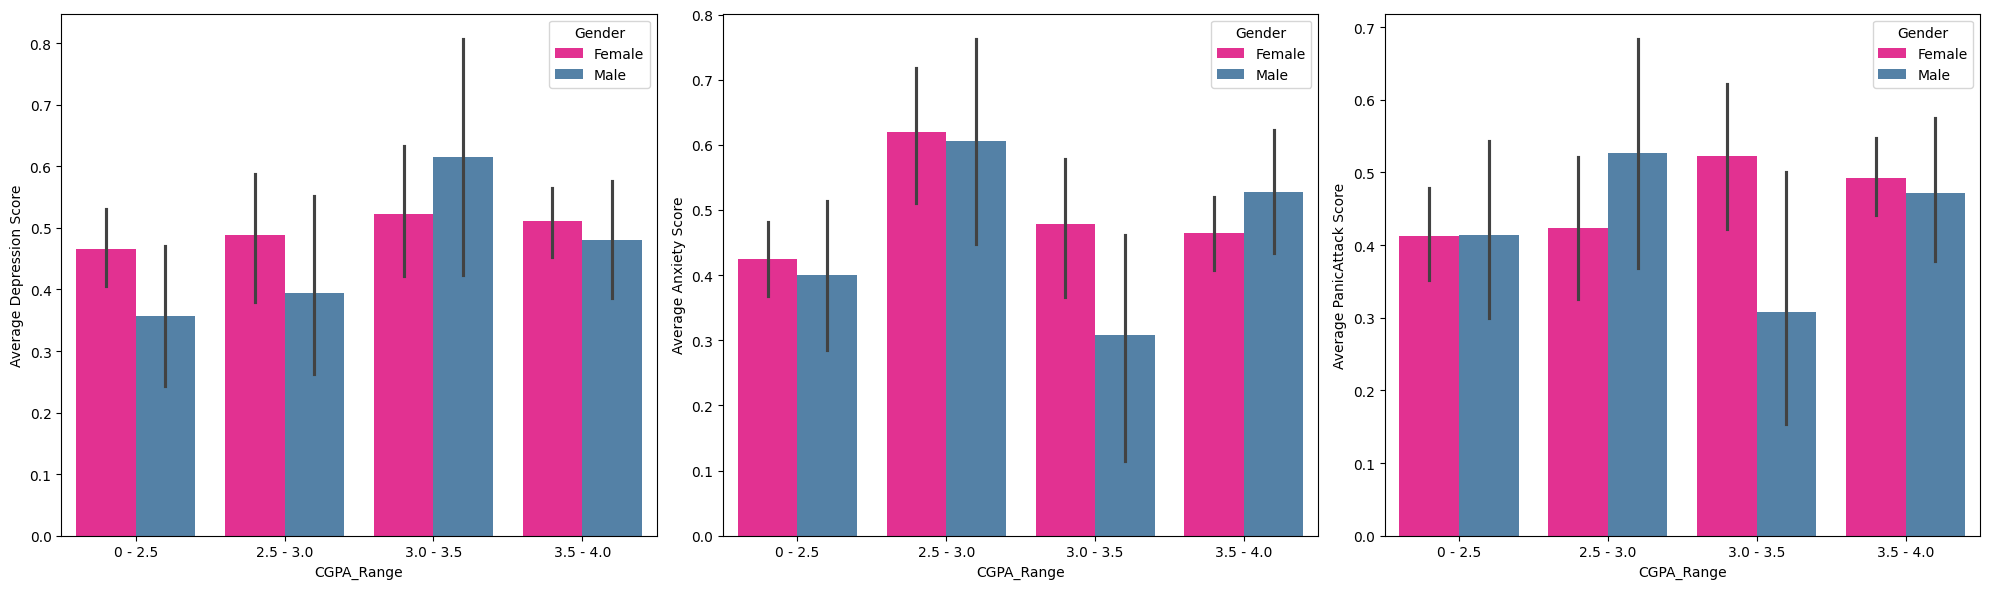

In [221]:
fig, axes = plt.subplots(1,3, figsize=(20,6))

mental_health_features = ['Depression','Anxiety','PanicAttack']
colors = ['deeppink','steelblue']
for i,features in enumerate(mental_health_features):
    sns.barplot(ax=axes[i], x='CGPA_Range', y=features, hue='Gender', data=df, palette=colors, order=['0 - 2.5', '2.5 - 3.0', '3.0 - 3.5', '3.5 - 4.0'])
    axes[i].set_ylabel(f'Average {features} Score')
    plt.tight_layout()

Based on the graphs generated above, the following insights can be made based on the CGPA and Gender distribution of the students:

**Depression Trends**: 
- The percentage of female students who suffer from depression remains relatively stable for all ranges of CGPA, showing no strong correlation between CGPA and presence of depression for female students.
- Male students who perform well and achieve high CGPAs (> CGPA 3.0) are more likely to suffer from depression based on the graph produced, particularly in the CGPA 3.0 to CGPA 3.5 range. This could be due to the academic stress and expectations imposed on them to perform well.


**Anxiety Trends**: 
- While the trend between CGPA and anxiety fluctuates, there is a considerable peak of both male and female students experiencing anxiety in the CGPA 2.5 to CGPA 3.0 range.
- This suggests that average-performing students are more prone to experiencing anxiety compared to underperforming and high-performing students.


**Panic Attack Trends**: 
- Similarly to anxiety, there is a non-linear relationship between CGPA and presence of panic attacks in the university students, with a notable peak in average to above-average performing students.
- This again points to possible stress factors affecting students who are not underperforming but may feel pressure to improve or maintain their performance.

### Mental Health Distribution Based on Course and Gender

As certain courses have higher enrollment than others, it is important to note that countplots may provide misleading statistics regarding the course that has the largest proportion of students who experiece mental health issues. Therefore, a barplot was also implemented beside each countplot to show the percentage of students from each course who experience having each of the mental health features provided.

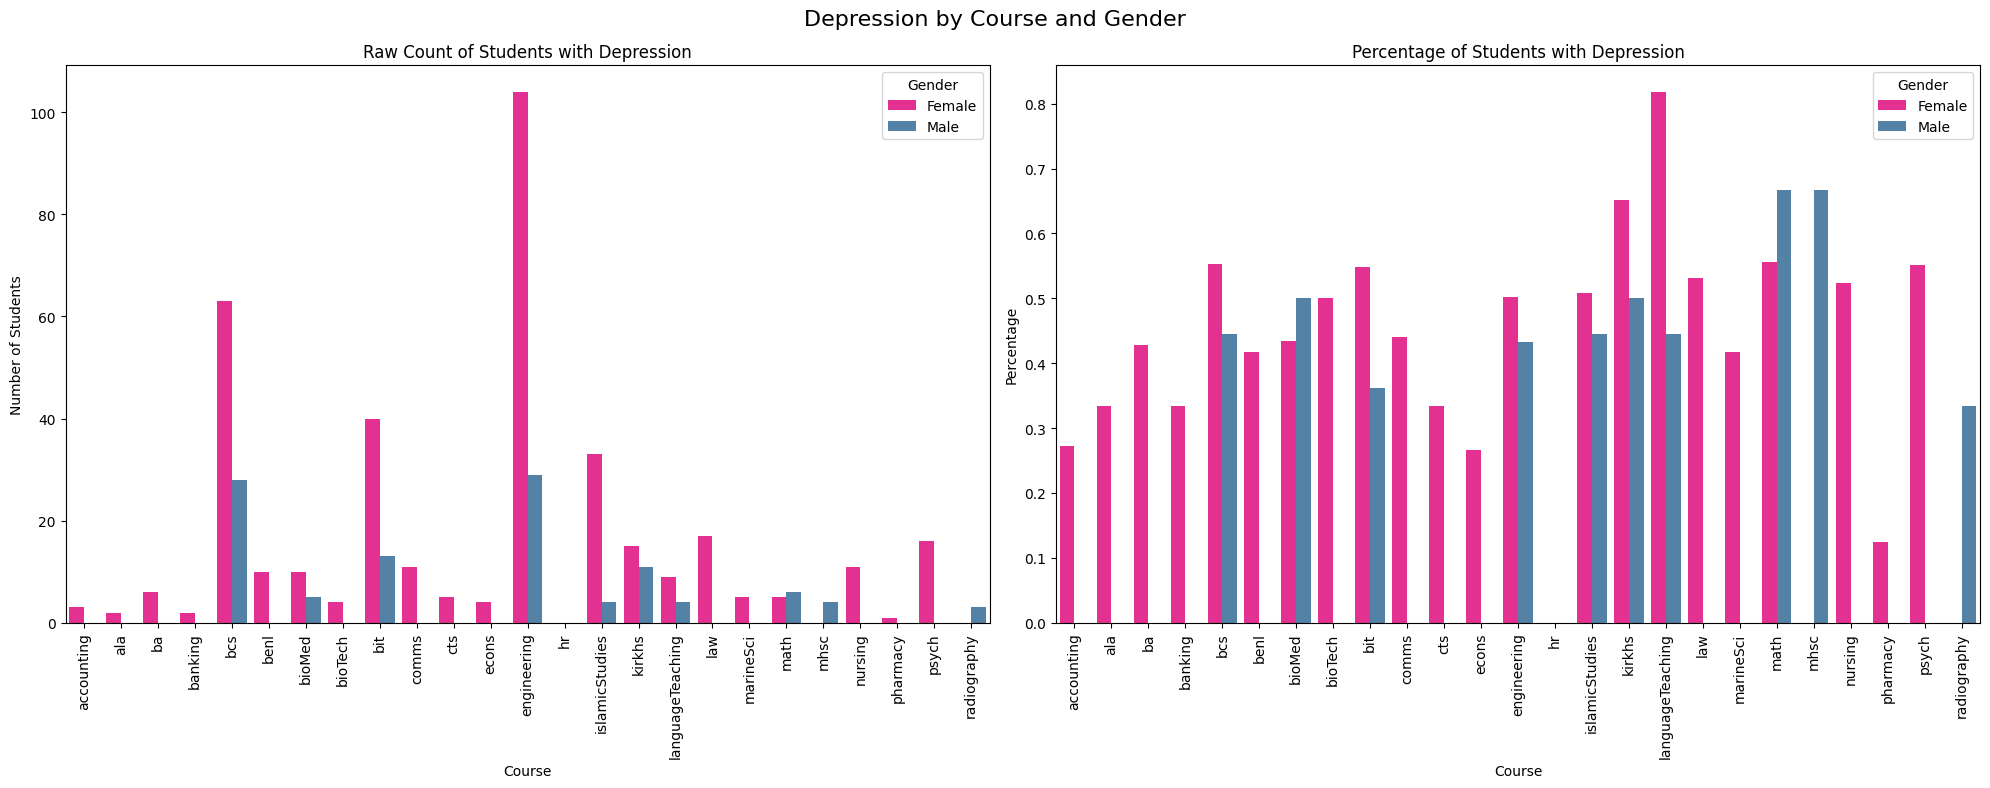

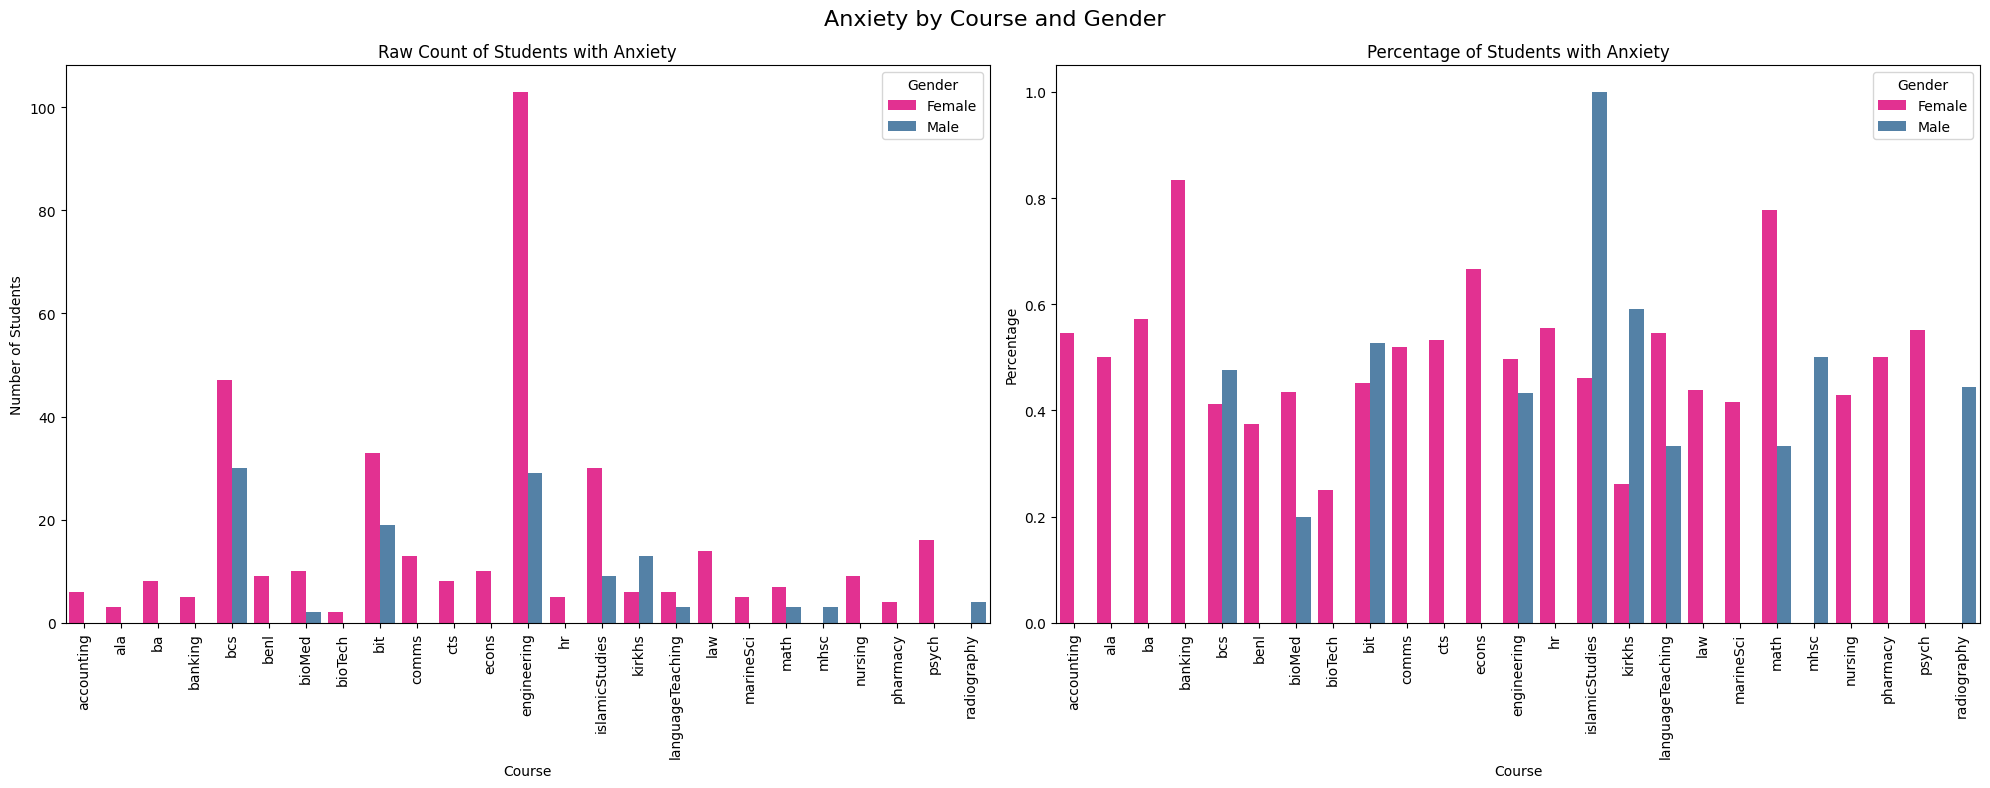

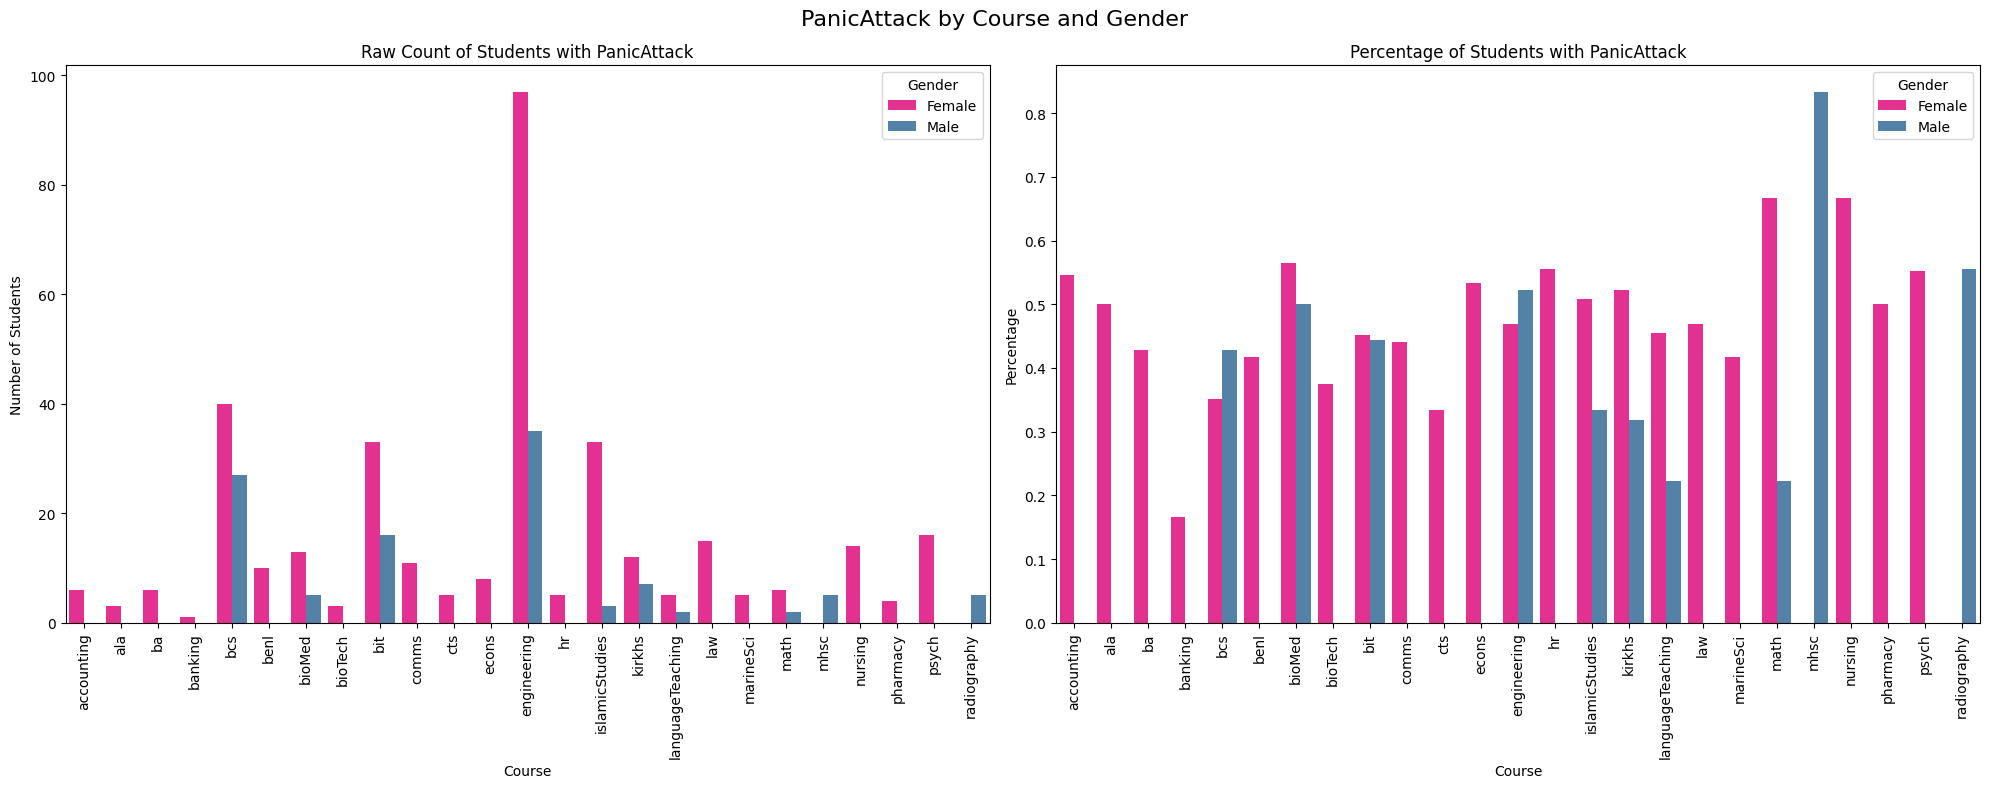

In [223]:
mental_health_features = ['Depression', 'Anxiety', 'PanicAttack']
colors = ['deeppink', 'steelblue']

for feature in mental_health_features:
    df_feature = df[df[feature] == 1]

    percent_df = (
        df[df[feature].notnull()]  # Ensure valid entries
        .groupby(['Course', 'Gender'])[feature]
        .mean()  # This gives the proportion (mean of 0/1)
        .reset_index()
        .rename(columns={feature: 'Percentage'})
    )

    fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=False)

    # Count plot
    sns.countplot(ax=axes[0], x='Course', hue='Gender', data=df_feature, palette=colors, order=sorted(df['Course'], key=str.lower))
    axes[0].set_title(f'Raw Count of Students with {feature}')
    axes[0].set_ylabel('Number of Students')
    axes[0].tick_params(axis='x', rotation=90)

    # Percentage plot
    sns.barplot(
        ax=axes[1],
        data=percent_df,
        x='Course',
        y='Percentage',
        hue='Gender',
        palette=colors
    )
    axes[1].set_title(f'Percentage of Students with {feature}')
    axes[1].set_ylabel('Percentage')
    axes[1].tick_params(axis='x', rotation=90)

    plt.suptitle(f'{feature} by Course and Gender', fontsize=16)
    plt.tight_layout()
    plt.show()


From the figure above, we can observe the trend between the presence of mental health features against the different courses with gender:

**Depression Trends**: 
- There is a significant spike in number of female engineering students who experience having depression, suggesting that this group may be particularly vulnerable to depression. However, when looking at the overall percentage of engineering students, the statistics show that there is a higher percentage of male engineering students that experience depression rather than female. 
- The graph suggests that females are more likely to report having depression across the different courses with some outling data showing males having more prevalence. This could be due to women being more likely to report having mental distress compared to men.
- Very few courses display a higher percentage of male students experiencing depression with math and MHSC courses being notable ones.
- The students studying human resources (HR) did not report experiencing depression, but this could be attributed to the small sample size from those courses taking part in the study.


**Anxiety Trends**: 
- Similarly, female students show generally higher levels of anxiety across most courses, due to a lack of male student data from certain courses in the study.
- Specific courses such as engineering, IT, and Science courses suggest high percentages of male students with anxiety due to high enrollment rates in those courses.
- Altohugh all six (6) of the male students in Islamic Studies reported having anxiety, there is still a higher amount of female Islamic Studies students reported to have anxiety.


**Panic Attack Trends**: 
- The trend for panic attacks closely mirrors those of depression and anxiety, with female students experiencing a higher rate of panic attacks.
- Science based courses such as engineering, IT, BCS and BioMed also show notable percentages of male students reporting panic attacks.
- MHSC, which consists of only male student data shows a high percentage of panic attacks, which is attributed to the small sample size of students from that course.

# Data Preprocessing

In [225]:
X = df.select_dtypes(include=['float64','int64'])

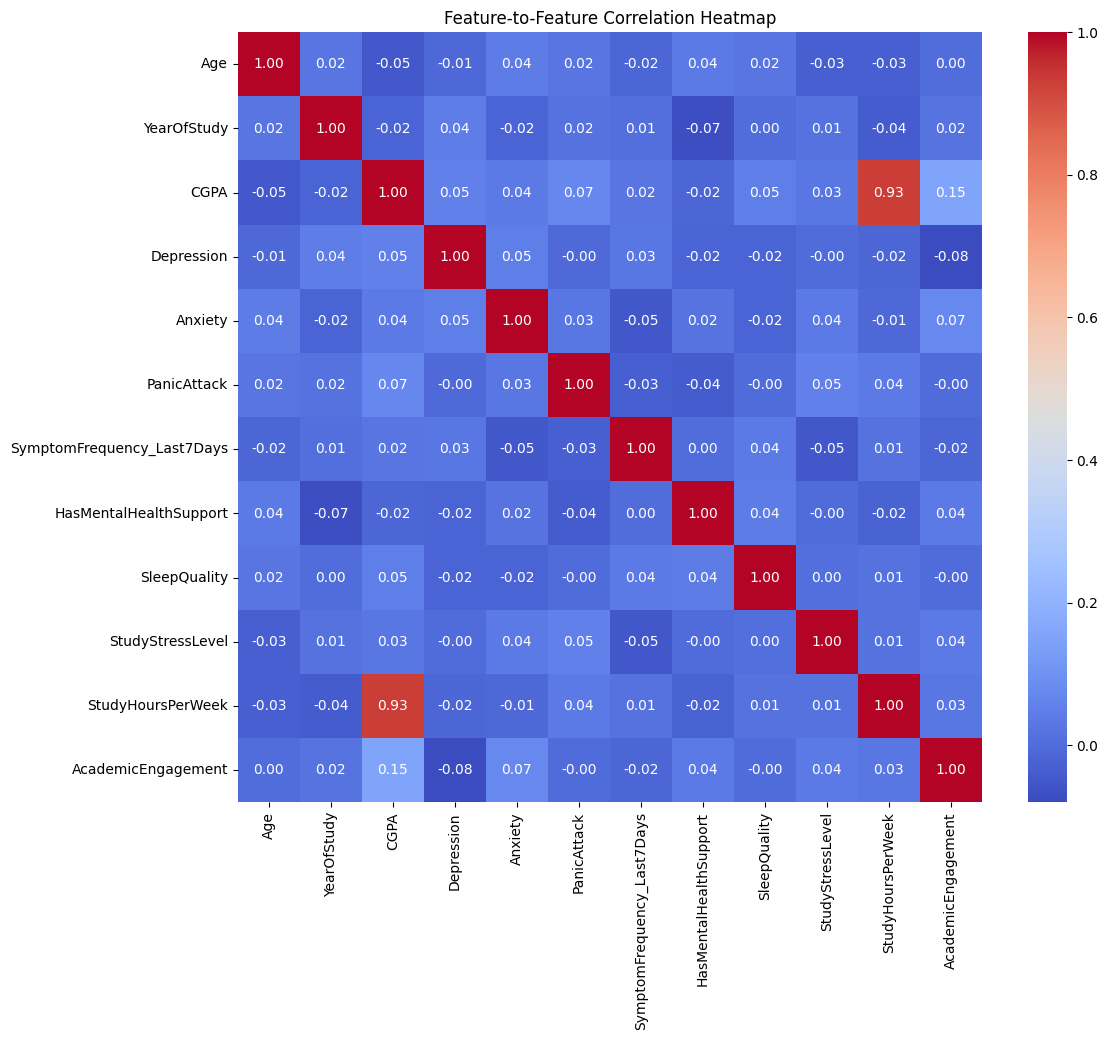

In [231]:
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature-to-Feature Correlation Heatmap")
plt.show()


We can see that StudyHoursPerWeek and CGPA is highly correlated, which could multicollinearity in the model if both features are retained. CGPA was dropped as CGPA_Range is already present as a feature.

# Machine Learning 

## Predicting __Depression__ Data

### Train-Test Split

In [235]:
x_dep = df.drop(['Depression','CGPA'], axis=1)
y_dep = df['Depression']
x_train_dep, x_test_dep, y_train_dep, y_test_dep = train_test_split(x_dep, y_dep, test_size=0.2, stratify=y_dep, random_state=42)

In [237]:
x_train_dep.head()

,Gender,Age,Course,YearOfStudy,Anxiety,PanicAttack,SymptomFrequency_Last7Days,HasMentalHealthSupport,SleepQuality,StudyStressLevel,StudyHoursPerWeek,AcademicEngagement,CGPA_Range
258,Female,19,bioTech,3,0,0,6,0,1,1,3,1,0 - 2.5
830,Female,18,psych,1,0,1,5,0,5,2,9,4,3.5 - 4.0
148,Male,25,bcs,1,0,0,4,0,4,2,5,4,3.0 - 3.5
8,Female,24,islamicStudies,2,0,0,5,0,4,4,5,3,0 - 2.5
845,Female,23,accounting,3,1,1,2,0,3,3,1,4,0 - 2.5


### Processing Numerical and Categorical Features

In [254]:
numeric_features = x_train_dep.select_dtypes(include=['float64','int64']).columns.tolist()

cat_features = x_train_dep.select_dtypes(include=['object']).columns.tolist()

In [256]:
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [258]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, cat_features)
    ]
)

### Random Forest Classifier (Highest Score = 0.515)

In [261]:
pipe_rf = Pipeline(steps=[
        ('encoder', OrdinalEncoder()),
        ('classifier', RandomForestClassifier(random_state=42))
    ])

pipe_rf.fit(x_train_dep, y_train_dep)

Pipeline(steps=[('encoder', OrdinalEncoder()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [269]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scorers
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
}

cv_results = cross_validate(pipe_rf, x_train_dep, y_train_dep, cv=cv, scoring=scoring, return_train_score=False)

print(f"--- Random Forest ---")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean F1 Score: {cv_results['test_f1'].mean():.3f}\n")


--- Random Forest ---
Mean Accuracy: 0.559
Mean F1 Score: 0.528



#### Hyperparameter Tuning for Random Forest Classifier (RandomizedSearhCV)

In [285]:
rf_param_grid = {
    'classifier__n_estimators': [100, 200, 300], 
    'classifier__max_depth': [None, 5, 10, 15],  
    'classifier__min_samples_split': [2, 5, 10], 
    'classifier__min_samples_leaf': [1, 2, 4],  
    'classifier__max_features': ['sqrt', 'log2', None],  
    'classifier__bootstrap': [True, False],    
    'classifier__class_weight': [None, 'balanced'] 
}

random_rf = RandomizedSearchCV(pipe_rf, param_distributions=rf_param_grid, n_iter=100, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42)
random_rf.fit(x_train_dep, y_train_dep)

best_model = random_rf.best_estimator_

# Re-run cross-validation on the best model
cv_results = cross_validate(best_model, x_train_dep, y_train_dep, cv=cv, scoring=scoring)

print(f"Best Params: {random_rf.best_params_}")
print(f"Mean Accuracy (CV): {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean F1 Score (CV): {cv_results['test_f1'].mean():.3f}")
print(f"Best Score: {best_model.score(x_test_dep, y_test_dep):.3f}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Params: {'classifier__n_estimators': 100, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 1, 'classifier__max_features': None, 'classifier__max_depth': 15, 'classifier__class_weight': 'balanced', 'classifier__bootstrap': True}
Mean Accuracy (CV): 0.556
Mean F1 Score (CV): 0.542
Best Score: 0.500


In [279]:
importances = best_model.named_steps['classifier'].feature_importances_
pd.DataFrame({'feature': x_train_dep.columns, 'importance': importances}).sort_values(by='importance', ascending=False)


,feature,importance
10,StudyHoursPerWeek,0.164049
2,Course,0.138792
6,SymptomFrequency_Last7Days,0.121269
1,Age,0.119282
11,AcademicEngagement,0.085355
8,SleepQuality,0.084560
9,StudyStressLevel,0.083191
3,YearOfStudy,0.059890
12,CGPA_Range,0.040781
4,Anxiety,0.031874


In [287]:
#Dropping HasMentalHealthSupport
x_train_dep_modified_rf = x_train_dep.drop(['HasMentalHealthSupport'],axis=1)
x_test_dep_modified_rf = x_test_dep.drop(['HasMentalHealthSupport'],axis=1)

rf_param_grid = {
    'classifier__n_estimators': [100, 200, 300], 
    'classifier__max_depth': [None, 5, 10, 15],  
    'classifier__min_samples_split': [2, 5, 10], 
    'classifier__min_samples_leaf': [1, 2, 4],  
    'classifier__max_features': ['sqrt', 'log2', None],  
    'classifier__bootstrap': [True, False],    
    'classifier__class_weight': [None, 'balanced'] 
}

random_rf = RandomizedSearchCV(pipe_rf, param_distributions=rf_param_grid, n_iter=100, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42)
random_rf.fit(x_train_dep_modified_rf, y_train_dep)

best_model = random_rf.best_estimator_

# Re-run cross-validation on the best model
cv_results = cross_validate(best_model, x_train_dep_modified_rf, y_train_dep, cv=cv, scoring=scoring)

print(f"Best Params: {random_rf.best_params_}")
print(f"Mean Accuracy (CV): {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean F1 Score (CV): {cv_results['test_f1'].mean():.3f}")
print(f"Best Score: {best_model.score(x_test_dep_modified_rf, y_test_dep):.3f}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Params: {'classifier__n_estimators': 200, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 2, 'classifier__max_features': 'log2', 'classifier__max_depth': None, 'classifier__class_weight': 'balanced', 'classifier__bootstrap': True}
Mean Accuracy (CV): 0.560
Mean F1 Score (CV): 0.539
Best Score: 0.540


In [289]:
y_pred_rf = best_model.predict(x_test_dep_modified_rf)
print(classification_report(y_test_dep, y_pred_rf))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55       103
           1       0.53      0.53      0.53        97

    accuracy                           0.54       200
   macro avg       0.54      0.54      0.54       200
weighted avg       0.54      0.54      0.54       200



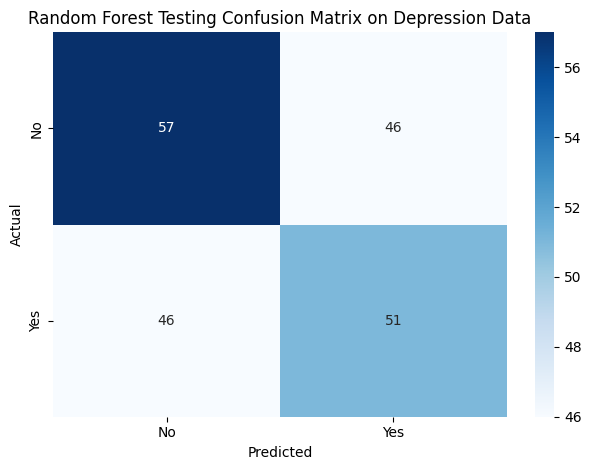

In [293]:
conf_matrix = confusion_matrix(y_test_dep, y_pred_rf)

plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)

plt.title('Random Forest Testing Confusion Matrix on Depression Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

### __Decision Tree Classifier (Highest Score = 0.580)__

In [295]:
pipe_dt = Pipeline(steps=[
        ('encoder', OrdinalEncoder()),
        ('classifier', DecisionTreeClassifier(random_state=42))
    ])

pipe_dt.fit(x_train_dep, y_train_dep)

Pipeline(steps=[('encoder', OrdinalEncoder()),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [297]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scorers
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
}

cv_results = cross_validate(pipe_dt, x_train_dep, y_train_dep, cv=cv, scoring=scoring, return_train_score=False)

print(f"--- Decision Tree ---")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean F1 Score: {cv_results['test_f1'].mean():.3f}\n")


--- Decision Tree ---
Mean Accuracy: 0.524
Mean F1 Score: 0.511



#### Hyperparameter Tuning for Decision Tree Classifier (RandomizedSearhCV)

In [305]:
dt_param_grid = {
    'classifier__max_depth': [3, 5, 7, 10, 15, None],               
    'classifier__min_samples_split': [2, 5, 10],                 
    'classifier__min_samples_leaf': [1, 2, 4, 8],                
    'classifier__max_features': ['sqrt', 'log2', None],          
    'classifier__criterion': ['gini', 'entropy'],                
    'classifier__class_weight': [None, 'balanced'],             
    'classifier__splitter': ['best', 'random'], 
}

random_dt = RandomizedSearchCV(pipe_dt, param_distributions=dt_param_grid, n_iter=500, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42)
random_dt.fit(x_train_dep, y_train_dep)

best_model = random_dt.best_estimator_

# Re-run cross-validation on the best model
cv_results = cross_validate(best_model, x_train_dep, y_train_dep, cv=cv, scoring=scoring)

print(f"Best Params: {random_dt.best_params_}")
print(f"Mean Accuracy (CV): {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean F1 Score (CV): {cv_results['test_f1'].mean():.3f}")
print(f"Best Score: {best_model.score(x_test_dep, y_test_dep):.3f}")

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best Params: {'classifier__splitter': 'best', 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 5, 'classifier__criterion': 'gini', 'classifier__class_weight': 'balanced'}
Mean Accuracy (CV): 0.556
Mean F1 Score (CV): 0.527
Best Score: 0.470


In [301]:
importances = best_model.named_steps['classifier'].feature_importances_
pd.DataFrame({'feature': x_train_dep.columns, 'importance': importances}).sort_values(by='importance', ascending=False)


,feature,importance
10,StudyHoursPerWeek,0.229927
11,AcademicEngagement,0.174830
2,Course,0.157271
4,Anxiety,0.126118
1,Age,0.094744
3,YearOfStudy,0.087273
6,SymptomFrequency_Last7Days,0.068601
5,PanicAttack,0.025116
0,Gender,0.024972
8,SleepQuality,0.011148


In [309]:
#Dropping HasMentalHealthSupport and StudyStressLevel
x_train_dep_modified = x_train_dep.drop(['HasMentalHealthSupport','StudyStressLevel',], axis=1)
x_test_dep_modified = x_test_dep.drop(['HasMentalHealthSupport','StudyStressLevel'], axis=1)

dt_param_grid = {
    'classifier__max_depth': [3, 5, 7, 10, 15, None],               
    'classifier__min_samples_split': [2, 5, 10],                 
    'classifier__min_samples_leaf': [1, 2, 4, 8],                
    'classifier__max_features': ['sqrt', 'log2', None],          
    'classifier__criterion': ['gini', 'entropy'],                
    'classifier__class_weight': [None, 'balanced'],             
    'classifier__splitter': ['best', 'random'], 
}

random_dt = RandomizedSearchCV(pipe_dt, param_distributions=dt_param_grid, n_iter=500, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42)
random_dt.fit(x_train_dep_modified, y_train_dep)

best_model = random_dt.best_estimator_

# Re-run cross-validation on the best model
cv_results = cross_validate(best_model, x_train_dep_modified, y_train_dep, cv=cv, scoring=scoring)

print(f"Best Params: {random_dt.best_params_}")
print(f"Mean Accuracy (CV): {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean F1 Score (CV): {cv_results['test_f1'].mean():.3f}")
print(f"Best Score: {best_model.score(x_test_dep_modified, y_test_dep):.3f}")

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best Params: {'classifier__splitter': 'random', 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 'log2', 'classifier__max_depth': None, 'classifier__criterion': 'entropy', 'classifier__class_weight': None}
Mean Accuracy (CV): 0.566
Mean F1 Score (CV): 0.541
Best Score: 0.580


In [311]:
y_pred_dt = best_model.predict(x_test_dep_modified)
print(classification_report(y_test_dep, y_pred_dt))

              precision    recall  f1-score   support

           0       0.59      0.62      0.60       103
           1       0.57      0.54      0.55        97

    accuracy                           0.58       200
   macro avg       0.58      0.58      0.58       200
weighted avg       0.58      0.58      0.58       200



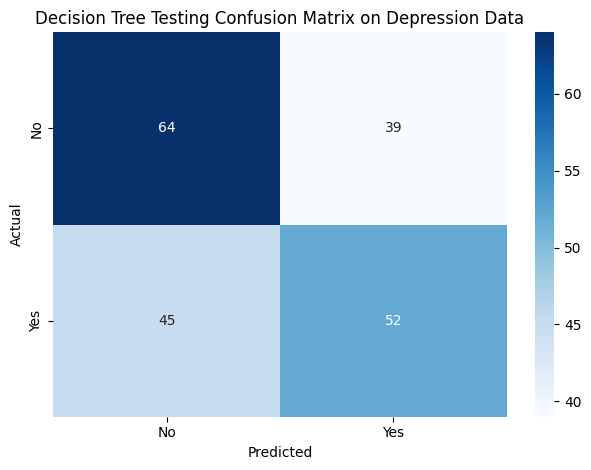

In [313]:
conf_matrix = confusion_matrix(y_test_dep, y_pred_dt)

plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)

plt.title('Decision Tree Testing Confusion Matrix on Depression Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

### XGBoost Classifier (Highest Score = 0.495)

In [315]:
pipe_xgb = Pipeline(steps=[
        ('encoder', OrdinalEncoder()),
        ('classifier', XGBClassifier(eval_metric='logloss', random_state=42))
    ])

pipe_xgb.fit(x_train_dep, y_train_dep)

Pipeline(steps=[('encoder', OrdinalEncoder()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [317]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scorers
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
}

cv_results = cross_validate(pipe_xgb, x_train_dep, y_train_dep, cv=cv, scoring=scoring, return_train_score=False)

print(f"--- XGBoost ---")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean F1 Score: {cv_results['test_f1'].mean():.3f}\n")


--- XGBoost ---
Mean Accuracy: 0.512
Mean F1 Score: 0.491



#### Hyperparameter Tuning for XGBoost Classifier (RandomizedSearhCV)

In [319]:
xgb_param_grid = {
    'classifier__max_depth': [100, 150, 200],
    'classifier__learning_rate': [0.03, 0.05, 0.06],
    'classifier__n_estimators': [150, 200, 250],
    'classifier__min_child_weight': [2, 3, 4],
    'classifier__scale_pos_weight': [0.2, 0.5, 0.8],
    'classifier__subsample': [0.8, 0.9, 1],  
    'classifier__colsample_bytree': [0.3, 0.5, 0.8],
    'classifier__colsample_bylevel': [0.7, 0.8, 0.9], 
    'classifier__reg_alpha': [0.01, 0.05, 0.1],  
    'classifier__reg_lambda': [0.05, 0.1, 0.2], 
    'classifier__max_delta_step': [1, 2, 3],    
    'classifier__gamma': [0, 0.1, 0.2]
}

random_xgb = RandomizedSearchCV(pipe_xgb, param_distributions=xgb_param_grid, n_iter=200, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42)
random_xgb.fit(x_train_dep, y_train_dep)

best_model = random_xgb.best_estimator_

# Re-run cross-validation on the best model
cv_results = cross_validate(best_model, x_train_dep, y_train_dep, cv=cv, scoring=scoring)

print(f"Best Params: {random_xgb.best_params_}")
print(f"Mean Accuracy (CV): {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean F1 Score (CV): {cv_results['test_f1'].mean():.3f}")
print(f"Best Score: {best_model.score(x_test_dep, y_test_dep):.3f}")

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best Params: {'classifier__subsample': 0.9, 'classifier__scale_pos_weight': 0.8, 'classifier__reg_lambda': 0.05, 'classifier__reg_alpha': 0.01, 'classifier__n_estimators': 150, 'classifier__min_child_weight': 2, 'classifier__max_depth': 150, 'classifier__max_delta_step': 3, 'classifier__learning_rate': 0.06, 'classifier__gamma': 0, 'classifier__colsample_bytree': 0.8, 'classifier__colsample_bylevel': 0.7}
Mean Accuracy (CV): 0.539
Mean F1 Score (CV): 0.502
Best Score: 0.490


In [321]:
importances = best_model.named_steps['classifier'].feature_importances_
pd.DataFrame({'feature': x_train_dep.columns, 'importance': importances}).sort_values(by='importance', ascending=False)


,feature,importance
12,CGPA_Range,0.088590
10,StudyHoursPerWeek,0.082603
6,SymptomFrequency_Last7Days,0.080775
2,Course,0.080621
9,StudyStressLevel,0.079337
3,YearOfStudy,0.079099
4,Anxiety,0.077799
11,AcademicEngagement,0.077637
1,Age,0.076889
5,PanicAttack,0.075016


In [329]:
#Dropping Gender and HasMentalHealthSupport
x_train_dep_modified_xgb = x_train_dep.drop(['Gender','HasMentalHealthSupport'],axis=1)
x_test_dep_modified_xgb = x_test_dep.drop(['Gender','HasMentalHealthSupport'],axis=1)

xgb_param_grid = {
    'classifier__max_depth': [100, 150, 200],
    'classifier__learning_rate': [0.03, 0.05, 0.06],
    'classifier__n_estimators': [150, 200, 250],
    'classifier__min_child_weight': [2, 3, 4],
    'classifier__scale_pos_weight': [0.2, 0.5, 0.8],
    'classifier__subsample': [0.8, 0.9, 1],  
    'classifier__colsample_bytree': [0.3, 0.5, 0.8],
    'classifier__colsample_bylevel': [0.7, 0.8, 0.9], 
    'classifier__reg_alpha': [0.01, 0.05, 0.1],  
    'classifier__reg_lambda': [0.05, 0.1, 0.2], 
    'classifier__max_delta_step': [1, 2, 3],    
    'classifier__gamma': [0, 0.1, 0.2]
}

random_xgb = RandomizedSearchCV(pipe_xgb, param_distributions=xgb_param_grid, n_iter=200, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42)
random_xgb.fit(x_train_dep_modified_xgb, y_train_dep)

best_model = random_xgb.best_estimator_

# Re-run cross-validation on the best model
cv_results = cross_validate(best_model, x_train_dep_modified_xgb, y_train_dep, cv=cv, scoring=scoring)

print(f"Best Params: {random_xgb.best_params_}")
print(f"Mean Accuracy (CV): {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean F1 Score (CV): {cv_results['test_f1'].mean():.3f}")
print(f"Best Score: {best_model.score(x_test_dep_modified_xgb, y_test_dep):.3f}")

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best Params: {'classifier__subsample': 1, 'classifier__scale_pos_weight': 0.8, 'classifier__reg_lambda': 0.1, 'classifier__reg_alpha': 0.1, 'classifier__n_estimators': 250, 'classifier__min_child_weight': 3, 'classifier__max_depth': 100, 'classifier__max_delta_step': 2, 'classifier__learning_rate': 0.06, 'classifier__gamma': 0, 'classifier__colsample_bytree': 0.8, 'classifier__colsample_bylevel': 0.7}
Mean Accuracy (CV): 0.559
Mean F1 Score (CV): 0.519
Best Score: 0.495


In [331]:
y_pred_xgb = best_model.predict(x_test_dep_modified_xgb)
print(classification_report(y_test_dep, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.51      0.54      0.53       103
           1       0.48      0.44      0.46        97

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200



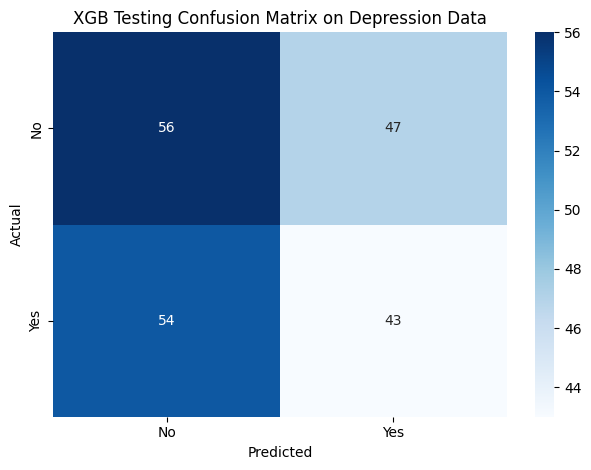

In [333]:
conf_matrix = confusion_matrix(y_test_dep, y_pred_xgb)

# Create a single plot for the confusion matrix
plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)

# Set the title and labels
plt.title('XGB Testing Confusion Matrix on Depression Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

### Logistic Regression (Highest Score = 0.570)

In [335]:
pipe_lr = Pipeline(steps=[
        ('preprocessor', preprocessor),
        #('pca', PCA(n_components=5)),
        ('classifier', LogisticRegression(max_iter=1000, solver='liblinear'))
    ])

pipe_lr.fit(x_train_dep, y_train_dep)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'YearOfStudy',
                                                   'Anxiety', 'PanicAttack',
                                                   'SymptomFrequency_Last7Days',
                                                   'HasMentalHealthSupport',
                                                   'SleepQuality',
                                                   'StudyStressLevel',
                                                   'StudyHoursPerWeek',
                                                   'AcademicEngagement']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Course',
                                                   'CGPA_Range'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, solver='liblinear'))])

In [337]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scorers
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
}

cv_results = cross_validate(pipe_lr, x_train_dep, y_train_dep, cv=cv, scoring=scoring, return_train_score=False)

print(f"--- Logistic Regression ---")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean F1 Score: {cv_results['test_f1'].mean():.3f}\n")


--- Logistic Regression ---
Mean Accuracy: 0.562
Mean F1 Score: 0.538



#### Hyperparameter Tuning for Logistic Regression (GridSearchCV)

In [339]:
#GridSearchCV

lr_param_grid = {
    #'pca__n_components': [5, 8, 10, 12, 13],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': np.logspace(-4, 4, 20), 
    'classifier__solver': ['liblinear', 'saga'],
}

grid_lr = GridSearchCV(pipe_lr, lr_param_grid, cv=cv, scoring=scoring, refit='accuracy', n_jobs=-1)
grid_lr.fit(x_train_dep, y_train_dep)

best_model = grid_lr.best_estimator_

# Re-run cross-validation on the best model
cv_results = cross_validate(best_model, x_train_dep, y_train_dep, cv=cv, scoring=scoring)

print(f"Best Params: {grid_lr.best_params_}")
print(f"Mean Accuracy (CV): {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean F1 Score (CV): {cv_results['test_f1'].mean():.3f}")
print(f"Best Score: {best_model.score(x_test_dep, y_test_dep):.3f}")

Best Params: {'classifier__C': 1.623776739188721, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Mean Accuracy (CV): 0.573
Mean F1 Score (CV): 0.549
Best Score: 0.570


In [341]:
y_pred_lr = best_model.predict(x_test_dep)
print(classification_report(y_test_dep, y_pred_lr))

              precision    recall  f1-score   support

           0       0.58      0.63      0.60       103
           1       0.56      0.51      0.53        97

    accuracy                           0.57       200
   macro avg       0.57      0.57      0.57       200
weighted avg       0.57      0.57      0.57       200



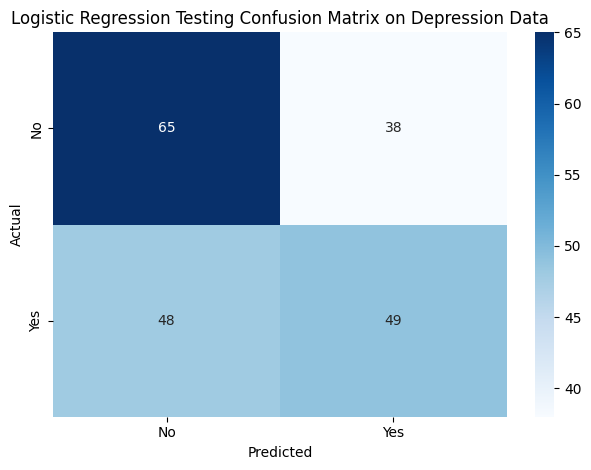

In [343]:
conf_matrix = confusion_matrix(y_test_dep, y_pred_lr)

# Create a single plot for the confusion matrix
plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)

# Set the title and labels
plt.title('Logistic Regression Testing Confusion Matrix on Depression Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

### SVC (Highest Score = 0.550)

In [350]:
pipe_svc = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', SVC())
    ])

pipe_svc.fit(x_train_dep, y_train_dep)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'YearOfStudy',
                                                   'Anxiety', 'PanicAttack',
                                                   'SymptomFrequency_Last7Days',
                                                   'HasMentalHealthSupport',
                                                   'SleepQuality',
                                                   'StudyStressLevel',
                                                   'StudyHoursPerWeek',
                                                   'AcademicEngagement']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Course',
                                                   'CGPA_Range'])])),
                ('classifier', SVC())])

In [352]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scorers
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
}

cv_results = cross_validate(pipe_svc, x_train_dep, y_train_dep, cv=cv, scoring=scoring, return_train_score=False)

print(f"--- SVC ---")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean F1 Score: {cv_results['test_f1'].mean():.3f}\n")


--- SVC ---
Mean Accuracy: 0.545
Mean F1 Score: 0.483



#### Hyperparameter Tuning for SVC (GridSearchCV)

In [354]:
#GridSearchCV

svc_param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'classifier__gamma': ['scale', 'auto'], 
    'classifier__degree': [2, 3, 4],         
    'classifier__probability': [True] 
}

grid_svc = GridSearchCV(pipe_svc, svc_param_grid, cv=cv, scoring=scoring, refit='accuracy', n_jobs=-1)
grid_svc.fit(x_train_dep, y_train_dep)

best_model = grid_svc.best_estimator_

# Re-run cross-validation on the best model
cv_results = cross_validate(best_model, x_train_dep, y_train_dep, cv=cv, scoring=scoring)

print(f"Best Params: {grid_svc.best_params_}")
print(f"Mean Accuracy (CV): {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean F1 Score (CV): {cv_results['test_f1'].mean():.3f}")
print(f"Best Score: {best_model.score(x_test_dep, y_test_dep):.3f}")

Best Params: {'classifier__C': 10, 'classifier__degree': 2, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear', 'classifier__probability': True}
Mean Accuracy (CV): 0.575
Mean F1 Score (CV): 0.562
Best Score: 0.550


In [359]:
y_pred_svc = best_model.predict(x_test_dep)
print(classification_report(y_test_dep, y_pred_svc))

              precision    recall  f1-score   support

           0       0.56      0.59      0.58       103
           1       0.54      0.51      0.52        97

    accuracy                           0.55       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.55      0.55      0.55       200



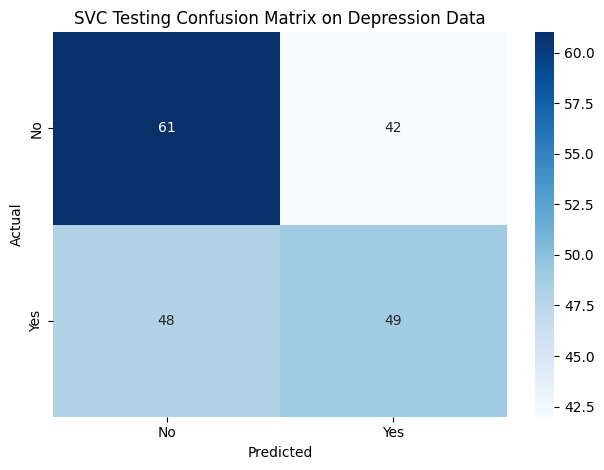

In [361]:
conf_matrix = confusion_matrix(y_test_dep, y_pred_svc)

# Create a single plot for the confusion matrix
plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)

# Set the title and labels
plt.title('SVC Testing Confusion Matrix on Depression Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

### KNN (Highest Score = 0.500)

In [363]:
pipe_knn = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier())
    ])

pipe_knn.fit(x_train_dep, y_train_dep)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'YearOfStudy',
                                                   'Anxiety', 'PanicAttack',
                                                   'SymptomFrequency_Last7Days',
                                                   'HasMentalHealthSupport',
                                                   'SleepQuality',
                                                   'StudyStressLevel',
                                                   'StudyHoursPerWeek',
                                                   'AcademicEngagement']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Course',
                                                   'CGPA_Range'])])),
                ('classifier', KNeighborsClassifier())])

In [365]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scorers
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
}

cv_results = cross_validate(pipe_knn, x_train_dep, y_train_dep, cv=cv, scoring=scoring, return_train_score=False)

print(f"--- KNN ---")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean F1 Score: {cv_results['test_f1'].mean():.3f}\n")


--- KNN ---
Mean Accuracy: 0.511
Mean F1 Score: 0.488



#### Hyperparameter Tuning for KNN (GridSearchCV)

In [368]:
#GridSearchCV

knn_param_grid = {
    'classifier__n_neighbors': list(range(3, 21, 2)),         
    'classifier__weights': ['uniform', 'distance'],           
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski'],  
    'classifier__p': [1, 2] 
}

grid_knn = GridSearchCV(pipe_knn, knn_param_grid, cv=cv, scoring=scoring, refit='accuracy', n_jobs=-1)
grid_knn.fit(x_train_dep, y_train_dep)

best_model = grid_knn.best_estimator_

# Re-run cross-validation on the best model
cv_results = cross_validate(best_model, x_train_dep, y_train_dep, cv=cv, scoring=scoring)

print(f"Best Params: {grid_knn.best_params_}")
print(f"Mean Accuracy (CV): {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean F1 Score (CV): {cv_results['test_f1'].mean():.3f}")
print(f"Best Score: {best_model.score(x_test_dep, y_test_dep):.3f}")

Best Params: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 13, 'classifier__p': 1, 'classifier__weights': 'uniform'}
Mean Accuracy (CV): 0.559
Mean F1 Score (CV): 0.559
Best Score: 0.500


In [370]:
y_pred_knn = best_model.predict(x_test_dep)
print(classification_report(y_test_dep, y_pred_knn))

              precision    recall  f1-score   support

           0       0.51      0.53      0.52       103
           1       0.48      0.46      0.47        97

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.50      0.50       200



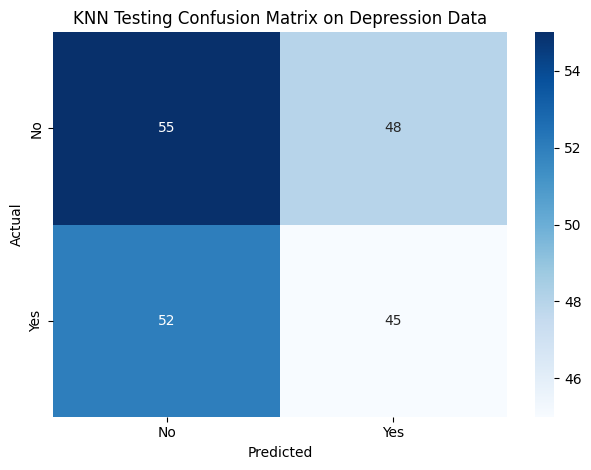

In [372]:
conf_matrix = confusion_matrix(y_test_dep, y_pred_knn)

# Create a single plot for the confusion matrix
plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)      

# Set the title and labels
plt.title('KNN Testing Confusion Matrix on Depression Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

## Predicting __Anxiety__ Data

### Train-Test Split

In [375]:
x_anx = df.drop(['Anxiety','CGPA'], axis=1)
y_anx = df['Anxiety']
x_train_anx, x_test_anx, y_train_anx, y_test_anx = train_test_split(x_anx, y_anx, test_size=0.2, stratify=y_anx, random_state=42)

In [377]:
x_train_anx.head()

,Gender,Age,Course,YearOfStudy,Depression,PanicAttack,SymptomFrequency_Last7Days,HasMentalHealthSupport,SleepQuality,StudyStressLevel,StudyHoursPerWeek,AcademicEngagement,CGPA_Range
73,Male,20,math,4,1,0,6,0,3,4,15,4,3.5 - 4.0
372,Female,25,bit,3,1,1,1,1,5,4,14,4,3.5 - 4.0
649,Female,23,law,3,1,1,4,0,1,3,8,3,3.0 - 3.5
686,Female,24,bcs,3,0,1,5,0,5,4,2,1,0 - 2.5
480,Female,24,engineering,3,0,1,3,0,4,2,17,5,3.5 - 4.0


### Processing Numerical and Categorical Features

In [380]:
numeric_features = x_train_anx.select_dtypes(include=['float64','int64']).columns.tolist()

cat_features = x_train_anx.select_dtypes(include=['object']).columns.tolist()

In [382]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [384]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, cat_features)
    ]
)

### Random Forest Classifier (Highest Score = 0.530)

In [387]:
pipe_rf = Pipeline(steps=[
        ('encoder', OrdinalEncoder()),
        ('classifier', RandomForestClassifier(random_state=42))
    ])

pipe_rf.fit(x_train_anx, y_train_anx)

Pipeline(steps=[('encoder', OrdinalEncoder()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [389]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scorers
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
}

cv_results = cross_validate(pipe_rf, x_train_anx, y_train_anx, cv=cv, scoring=scoring, return_train_score=False)

print(f"--- Random Forest ---")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean F1 Score: {cv_results['test_f1'].mean():.3f}\n")


--- Random Forest ---
Mean Accuracy: 0.520
Mean F1 Score: 0.455



#### Hyperparameter Tuning for Random Forest Classifier (RandomizedSearchCV)

In [391]:
rf_param_grid = {
    'classifier__n_estimators': [100, 200, 300], 
    'classifier__max_depth': [None, 5, 10, 15],  
    'classifier__min_samples_split': [2, 5, 10], 
    'classifier__min_samples_leaf': [1, 2, 4],  
    'classifier__max_features': ['sqrt', 'log2', None],  
    'classifier__bootstrap': [True, False],    
    'classifier__class_weight': [None, 'balanced'] 
}

random_rf = RandomizedSearchCV(pipe_rf, param_distributions=rf_param_grid, n_iter=100, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42)
random_rf.fit(x_train_anx, y_train_anx)

best_model = random_rf.best_estimator_

# Re-run cross-validation on the best model
cv_results = cross_validate(best_model, x_train_anx, y_train_anx, cv=cv, scoring=scoring)

print(f"Best Params: {random_rf.best_params_}")
print(f"Mean Accuracy (CV): {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean F1 Score (CV): {cv_results['test_f1'].mean():.3f}")
print(f"Best Score: {best_model.score(x_test_anx, y_test_anx):.3f}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Params: {'classifier__n_estimators': 100, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 2, 'classifier__max_features': 'log2', 'classifier__max_depth': None, 'classifier__class_weight': 'balanced', 'classifier__bootstrap': True}
Mean Accuracy (CV): 0.544
Mean F1 Score (CV): 0.510
Best Score: 0.515


In [393]:
importances = best_model.named_steps['classifier'].feature_importances_
pd.DataFrame({'feature': x_train_anx.columns, 'importance': importances}).sort_values(by='importance', ascending=False)

,feature,importance
10,StudyHoursPerWeek,0.135581
2,Course,0.126547
1,Age,0.114804
6,SymptomFrequency_Last7Days,0.114367
9,StudyStressLevel,0.097098
8,SleepQuality,0.092198
11,AcademicEngagement,0.088364
3,YearOfStudy,0.069438
12,CGPA_Range,0.058198
4,Depression,0.036098


In [405]:
#Dropping Gender and HasMentalHealthSupport
x_train_anx_modified_rf = x_train_anx.drop(['PanicAttack','Gender','HasMentalHealthSupport'],axis=1)
x_test_anx_modified_rf = x_test_anx.drop(['PanicAttack','Gender','HasMentalHealthSupport'],axis=1)

rf_param_grid = {
    'classifier__n_estimators': [100, 200, 300], 
    'classifier__max_depth': [None, 5, 10, 15],  
    'classifier__min_samples_split': [2, 5, 10], 
    'classifier__min_samples_leaf': [1, 2, 4],  
    'classifier__max_features': ['sqrt', 'log2', None],  
    'classifier__bootstrap': [True, False],    
    'classifier__class_weight': [None, 'balanced'] 
}

random_rf = RandomizedSearchCV(pipe_rf, param_distributions=rf_param_grid, n_iter=100, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42)
random_rf.fit(x_train_anx_modified_rf, y_train_anx)

best_model = random_rf.best_estimator_

# Re-run cross-validation on the best model
cv_results = cross_validate(best_model, x_train_anx_modified_rf, y_train_anx, cv=cv, scoring=scoring)

print(f"Best Params: {random_rf.best_params_}")
print(f"Mean Accuracy (CV): {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean F1 Score (CV): {cv_results['test_f1'].mean():.3f}")
print(f"Best Score: {best_model.score(x_test_anx_modified_rf, y_test_anx):.3f}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Params: {'classifier__n_estimators': 300, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 2, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 15, 'classifier__class_weight': None, 'classifier__bootstrap': True}
Mean Accuracy (CV): 0.546
Mean F1 Score (CV): 0.488
Best Score: 0.530


In [407]:
y_pred_rf = best_model.predict(x_test_anx_modified_rf)
print(classification_report(y_test_anx, y_pred_rf))

              precision    recall  f1-score   support

           0       0.55      0.59      0.57       105
           1       0.51      0.46      0.48        95

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.53      0.53      0.53       200



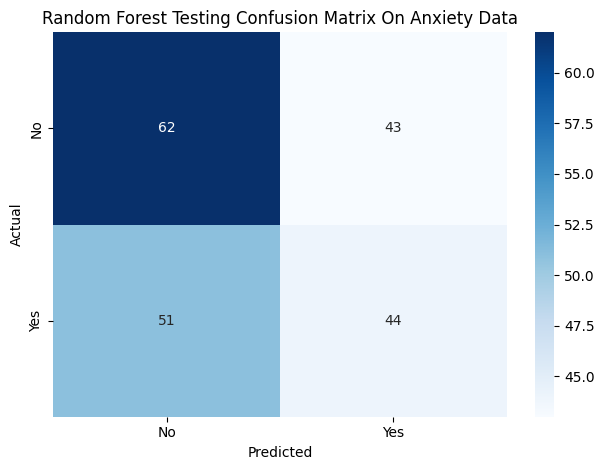

In [409]:
conf_matrix = confusion_matrix(y_test_anx, y_pred_rf)

# Create a single plot for the confusion matrix
plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)

# Set the title and labels
plt.title('Random Forest Testing Confusion Matrix On Anxiety Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

### __Decision Tree Classifier (Highest Score = 0.575)__

In [412]:
pipe_dt = Pipeline(steps=[
        ('encoder', OrdinalEncoder()),
        ('classifier', DecisionTreeClassifier(random_state=42))
    ])

pipe_dt.fit(x_train_anx, y_train_anx)

Pipeline(steps=[('encoder', OrdinalEncoder()),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [414]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scorers
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
}

cv_results = cross_validate(pipe_dt, x_train_anx, y_train_anx, cv=cv, scoring=scoring, return_train_score=False)

print(f"--- Decision Tree ---")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean F1 Score: {cv_results['test_f1'].mean():.3f}\n")


--- Decision Tree ---
Mean Accuracy: 0.489
Mean F1 Score: 0.474



#### Hyperparameter Tuning for Decision Tree Classifier (RandomizedSearchCV)

In [418]:
dt_param_grid = {
    'classifier__max_depth': [3, 5, 7, 10, 15, None],               
    'classifier__min_samples_split': [2, 5, 10],                 
    'classifier__min_samples_leaf': [1, 2, 4, 8],                
    'classifier__max_features': ['sqrt', 'log2', None],          
    'classifier__criterion': ['gini', 'entropy'],                
    'classifier__class_weight': [None, 'balanced'],             
    'classifier__splitter': ['best', 'random'], 
}

random_dt = RandomizedSearchCV(pipe_dt, param_distributions=dt_param_grid, n_iter=500, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42)
random_dt.fit(x_train_anx, y_train_anx)

best_model = random_dt.best_estimator_

# Re-run cross-validation on the best model
cv_results = cross_validate(best_model, x_train_anx, y_train_anx, cv=cv, scoring=scoring)

print(f"Best Params: {random_dt.best_params_}")
print(f"Mean Accuracy (CV): {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean F1 Score (CV): {cv_results['test_f1'].mean():.3f}")
print(f"Best Score: {best_model.score(x_test_anx, y_test_anx):.3f}")

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best Params: {'classifier__splitter': 'random', 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 8, 'classifier__max_features': 'log2', 'classifier__max_depth': 3, 'classifier__criterion': 'entropy', 'classifier__class_weight': 'balanced'}
Mean Accuracy (CV): 0.544
Mean F1 Score (CV): 0.502
Best Score: 0.465


In [420]:
importances = best_model.named_steps['classifier'].feature_importances_
pd.DataFrame({'feature': x_train_anx.columns, 'importance': importances}).sort_values(by='importance', ascending=False)


,feature,importance
11,AcademicEngagement,0.390780
4,Depression,0.217605
9,StudyStressLevel,0.211673
12,CGPA_Range,0.156687
1,Age,0.023255
0,Gender,0.000000
2,Course,0.000000
3,YearOfStudy,0.000000
5,PanicAttack,0.000000
6,SymptomFrequency_Last7Days,0.000000


In [422]:
#Dropping HasMentalHealthSupport and StudyStressLevel
x_train_anx_modified = x_train_anx.drop(['HasMentalHealthSupport','StudyStressLevel','Course'], axis=1)
x_test_anx_modified = x_test_anx.drop(['HasMentalHealthSupport','StudyStressLevel','Course'], axis=1)

dt_param_grid = {
    'classifier__max_depth': [3, 5, 7, 10, 15, None],               
    'classifier__min_samples_split': [2, 5, 10],                 
    'classifier__min_samples_leaf': [1, 2, 4, 8],                
    'classifier__max_features': ['sqrt', 'log2', None],          
    'classifier__criterion': ['gini', 'entropy'],                
    'classifier__class_weight': [None, 'balanced'],             
    'classifier__splitter': ['best', 'random'], 
}

random_dt = RandomizedSearchCV(pipe_dt, param_distributions=dt_param_grid, n_iter=500, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42)
random_dt.fit(x_train_anx_modified, y_train_anx)

best_model = random_dt.best_estimator_

# Re-run cross-validation on the best model
cv_results = cross_validate(best_model, x_train_anx_modified, y_train_anx, cv=cv, scoring=scoring)

print(f"Best Params: {random_dt.best_params_}")
print(f"Mean Accuracy (CV): {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean F1 Score (CV): {cv_results['test_f1'].mean():.3f}")
print(f"Best Score: {best_model.score(x_test_anx_modified, y_test_anx):.3f}")

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best Params: {'classifier__splitter': 'best', 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 10, 'classifier__criterion': 'gini', 'classifier__class_weight': None}
Mean Accuracy (CV): 0.562
Mean F1 Score (CV): 0.518
Best Score: 0.575


In [424]:
y_pred_dt = best_model.predict(x_test_anx_modified)
print(classification_report(y_test_anx, y_pred_dt))

              precision    recall  f1-score   support

           0       0.59      0.63      0.61       105
           1       0.56      0.52      0.54        95

    accuracy                           0.57       200
   macro avg       0.57      0.57      0.57       200
weighted avg       0.57      0.57      0.57       200



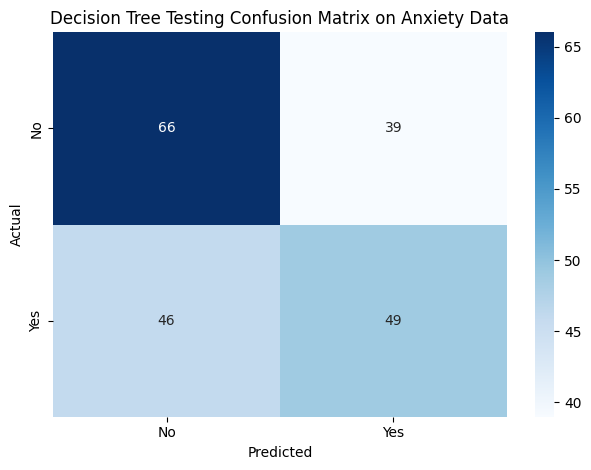

In [426]:
conf_matrix = confusion_matrix(y_test_anx, y_pred_dt)

# Create a single plot for the confusion matrix
plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)

# Set the title and labels
plt.title('Decision Tree Testing Confusion Matrix on Anxiety Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

### XGBoost Classifier (Highest Score = 0.565)

In [428]:
pipe_xgb = Pipeline(steps=[
        ('encoder', OrdinalEncoder()),
        ('classifier', XGBClassifier(eval_metric='logloss', random_state=42))
    ])

pipe_xgb.fit(x_train_anx, y_train_anx)

Pipeline(steps=[('encoder', OrdinalEncoder()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [430]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scorers
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
}

cv_results = cross_validate(pipe_xgb, x_train_anx, y_train_anx, cv=cv, scoring=scoring, return_train_score=False)

print(f"--- XGBoost ---")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean F1 Score: {cv_results['test_f1'].mean():.3f}\n")


--- XGBoost ---
Mean Accuracy: 0.514
Mean F1 Score: 0.479



#### Hyperparameter Tuning for XGBoost Classifier (RandomizedSearchCV)

In [451]:
xgb_param_grid = {
    'classifier__max_depth': [100, 150, 200],
    'classifier__learning_rate': [0.03, 0.05, 0.06],
    'classifier__n_estimators': [150, 200, 250],
    'classifier__min_child_weight': [2, 3, 4],
    'classifier__scale_pos_weight': [0.2, 0.5, 0.8],
    'classifier__subsample': [0.8, 0.9, 1],  
    'classifier__colsample_bytree': [0.3, 0.5, 0.8],
    'classifier__colsample_bylevel': [0.7, 0.8, 0.9], 
    'classifier__reg_alpha': [0.01, 0.05, 0.1],  
    'classifier__reg_lambda': [0.05, 0.1, 0.2], 
    'classifier__max_delta_step': [1, 2, 3],    
    'classifier__gamma': [0, 0.1, 0.2]
}

random_xgb = RandomizedSearchCV(pipe_xgb, param_distributions=xgb_param_grid, n_iter=500, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42)
random_xgb.fit(x_train_anx, y_train_anx)

best_model = random_xgb.best_estimator_

# Re-run cross-validation on the best model
cv_results = cross_validate(best_model, x_train_anx, y_train_anx, cv=cv, scoring=scoring)

print(f"Best Params: {random_xgb.best_params_}")
print(f"Mean Accuracy (CV): {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean F1 Score (CV): {cv_results['test_f1'].mean():.3f}")
print(f"Best Score: {best_model.score(x_test_anx, y_test_anx):.3f}")

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best Params: {'classifier__subsample': 0.8, 'classifier__scale_pos_weight': 0.8, 'classifier__reg_lambda': 0.05, 'classifier__reg_alpha': 0.05, 'classifier__n_estimators': 200, 'classifier__min_child_weight': 2, 'classifier__max_depth': 100, 'classifier__max_delta_step': 1, 'classifier__learning_rate': 0.03, 'classifier__gamma': 0, 'classifier__colsample_bytree': 0.5, 'classifier__colsample_bylevel': 0.7}
Mean Accuracy (CV): 0.555
Mean F1 Score (CV): 0.463
Best Score: 0.565


In [434]:
importances = best_model.named_steps['classifier'].feature_importances_
pd.DataFrame({'feature': x_train_anx.columns, 'importance': importances}).sort_values(by='importance', ascending=False)


,feature,importance
12,CGPA_Range,0.098715
2,Course,0.087546
10,StudyHoursPerWeek,0.082691
1,Age,0.079596
7,HasMentalHealthSupport,0.077172
9,StudyStressLevel,0.076832
6,SymptomFrequency_Last7Days,0.076827
11,AcademicEngagement,0.074409
8,SleepQuality,0.074153
3,YearOfStudy,0.072988


In [447]:
#Dropping PanicAttack
x_train_anx_modified_xgb = x_train_anx.drop(['PanicAttack'],axis=1)
x_test_anx_modified_xgb = x_test_anx.drop(['PanicAttack'],axis=1)

xgb_param_grid = {
    'classifier__max_depth': [100, 150, 200],
    'classifier__learning_rate': [0.03, 0.05, 0.06],
    'classifier__n_estimators': [150, 200, 250],
    'classifier__min_child_weight': [2, 3, 4],
    'classifier__scale_pos_weight': [0.2, 0.5, 0.8],
    'classifier__subsample': [0.8, 0.9, 1],  
    'classifier__colsample_bytree': [0.3, 0.5, 0.8],
    'classifier__colsample_bylevel': [0.7, 0.8, 0.9], 
    'classifier__reg_alpha': [0.01, 0.05, 0.1],  
    'classifier__reg_lambda': [0.05, 0.1, 0.2], 
    'classifier__max_delta_step': [1, 2, 3],    
    'classifier__gamma': [0, 0.1, 0.2]
}

random_xgb = RandomizedSearchCV(pipe_xgb, param_distributions=xgb_param_grid, n_iter=500, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42)
random_xgb.fit(x_train_anx_modified_xgb, y_train_anx)

best_model = random_xgb.best_estimator_

# Re-run cross-validation on the best model
cv_results = cross_validate(best_model, x_train_anx_modified_xgb, y_train_anx, cv=cv, scoring=scoring)

print(f"Best Params: {random_xgb.best_params_}")
print(f"Mean Accuracy (CV): {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean F1 Score (CV): {cv_results['test_f1'].mean():.3f}")
print(f"Best Score: {best_model.score(x_test_anx_modified_xgb, y_test_anx):.3f}")

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best Params: {'classifier__subsample': 0.9, 'classifier__scale_pos_weight': 0.5, 'classifier__reg_lambda': 0.05, 'classifier__reg_alpha': 0.01, 'classifier__n_estimators': 200, 'classifier__min_child_weight': 2, 'classifier__max_depth': 100, 'classifier__max_delta_step': 2, 'classifier__learning_rate': 0.05, 'classifier__gamma': 0.1, 'classifier__colsample_bytree': 0.5, 'classifier__colsample_bylevel': 0.8}
Mean Accuracy (CV): 0.554
Mean F1 Score (CV): 0.412
Best Score: 0.565


After removing the less important features, it was discovered that the model performed worse than if all the features were kept. Thus, all features were retained to maintain the predictive power of the model.

In [452]:
y_pred_xgb = best_model.predict(x_test_anx)
print(classification_report(y_test_anx, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.57      0.66      0.61       105
           1       0.55      0.46      0.50        95

    accuracy                           0.56       200
   macro avg       0.56      0.56      0.56       200
weighted avg       0.56      0.56      0.56       200



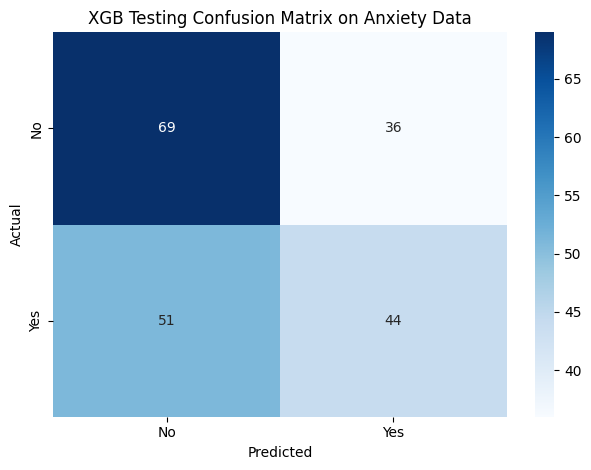

In [453]:
conf_matrix = confusion_matrix(y_test_anx, y_pred_xgb)

# Create a single plot for the confusion matrix
plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)

# Set the title and labels
plt.title('XGB Testing Confusion Matrix on Anxiety Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

### Logistic Regression (Highest Score = 0.495)

In [472]:
pipe_lr = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('pca', PCA(n_components=5)),
        ('classifier', LogisticRegression(max_iter=1000, solver='liblinear'))
    ])

pipe_lr.fit(x_train_anx, y_train_anx)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'YearOfStudy',
                                                   'Depression', 'PanicAttack',
                                                   'SymptomFrequency_Last7Days',
                                                   'HasMentalHealthSupport',
                                                   'SleepQuality',
                                                   'StudyStressLevel',
                                                   'StudyHoursPerWeek',
                                                   'AcademicEngagement']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Course',
                                                   'CGPA_Range'])])),
                ('pca', PCA(n_components=5)),
                ('classifier',
                 LogisticRegression(max_iter=1000, solver='liblinear'))])

In [474]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scorers
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
}

cv_results = cross_validate(pipe_lr, x_train_anx, y_train_anx, cv=cv, scoring=scoring, return_train_score=False)

print(f"--- Logistic Regression ---")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean F1 Score: {cv_results['test_f1'].mean():.3f}")

--- Logistic Regression ---
Mean Accuracy: 0.527
Mean F1 Score: 0.377


#### Hyperparameter Tuning for Logistic Regression

In [476]:
#GridSearchCV

lr_param_grid = {
    'pca__n_components': [5, 8, 10, 12, 13],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': np.logspace(-4, 4, 20), 
    'classifier__solver': ['liblinear', 'saga'],
}

grid_lr = GridSearchCV(pipe_lr, lr_param_grid, cv=cv, scoring=scoring, refit='accuracy', n_jobs=-1)
grid_lr.fit(x_train_anx, y_train_anx)

best_model = grid_lr.best_estimator_

# Re-run cross-validation on the best model
cv_results = cross_validate(best_model, x_train_anx, y_train_anx, cv=cv, scoring=scoring)

print(f"Best Params: {grid_lr.best_params_}")
print(f"Mean Accuracy (CV): {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean F1 Score (CV): {cv_results['test_f1'].mean():.3f}")
print(f"Best Score: {best_model.score(x_test_anx, y_test_anx):.3f}")

Best Params: {'classifier__C': 0.615848211066026, 'classifier__penalty': 'l1', 'classifier__solver': 'saga', 'pca__n_components': 12}
Mean Accuracy (CV): 0.541
Mean F1 Score (CV): 0.454
Best Score: 0.495


In [478]:
y_pred_lr = best_model.predict(x_test_anx)
print(classification_report(y_test_anx, y_pred_lr))

              precision    recall  f1-score   support

           0       0.52      0.60      0.56       105
           1       0.46      0.38      0.42        95

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200



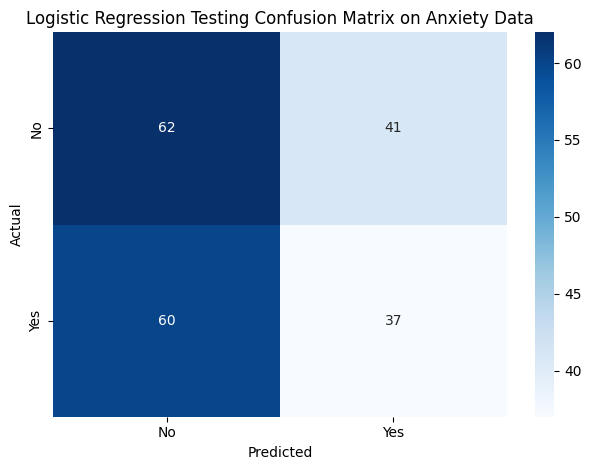

In [480]:
conf_matrix = confusion_matrix(y_test_dep, y_pred_lr)

# Create a single plot for the confusion matrix
plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)

# Set the title and labels
plt.title('Logistic Regression Testing Confusion Matrix on Anxiety Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

### SVC (Highest Score = 0.475)

In [482]:
pipe_svc = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', SVC())
    ])

pipe_svc.fit(x_train_anx, y_train_anx)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'YearOfStudy',
                                                   'Depression', 'PanicAttack',
                                                   'SymptomFrequency_Last7Days',
                                                   'HasMentalHealthSupport',
                                                   'SleepQuality',
                                                   'StudyStressLevel',
                                                   'StudyHoursPerWeek',
                                                   'AcademicEngagement']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Course',
                                                   'CGPA_Range'])])),
                ('classifier', SVC())])

In [484]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scorers
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
}

cv_results = cross_validate(pipe_svc, x_train_anx, y_train_anx, cv=cv, scoring=scoring, return_train_score=False)

print(f"--- SVC ---")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean F1 Score: {cv_results['test_f1'].mean():.3f}")

--- SVC ---
Mean Accuracy: 0.510
Mean F1 Score: 0.437


#### Hyperparameter Tuning for SVC

In [487]:
#GridSearchCV

svc_param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'classifier__gamma': ['scale', 'auto'], 
    'classifier__degree': [2, 3, 4],         
    'classifier__probability': [True] 
}

grid_svc = GridSearchCV(pipe_svc, svc_param_grid, cv=cv, scoring=scoring, refit='accuracy', n_jobs=-1)
grid_svc.fit(x_train_anx, y_train_anx)

best_model = grid_svc.best_estimator_

# Re-run cross-validation on the best model
cv_results = cross_validate(best_model, x_train_anx, y_train_anx, cv=cv, scoring=scoring)

print(f"Best Params: {grid_svc.best_params_}")
print(f"Mean Accuracy (CV): {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean F1 Score (CV): {cv_results['test_f1'].mean():.3f}")
print(f"Best Score: {best_model.score(x_test_anx, y_test_anx):.3f}")

Best Params: {'classifier__C': 1, 'classifier__degree': 2, 'classifier__gamma': 'scale', 'classifier__kernel': 'sigmoid', 'classifier__probability': True}
Mean Accuracy (CV): 0.535
Mean F1 Score (CV): 0.425
Best Score: 0.475


In [489]:
y_pred_svc = best_model.predict(x_test_anx)
print(classification_report(y_test_anx, y_pred_svc))

              precision    recall  f1-score   support

           0       0.50      0.62      0.55       105
           1       0.43      0.32      0.36        95

    accuracy                           0.47       200
   macro avg       0.46      0.47      0.46       200
weighted avg       0.47      0.47      0.46       200



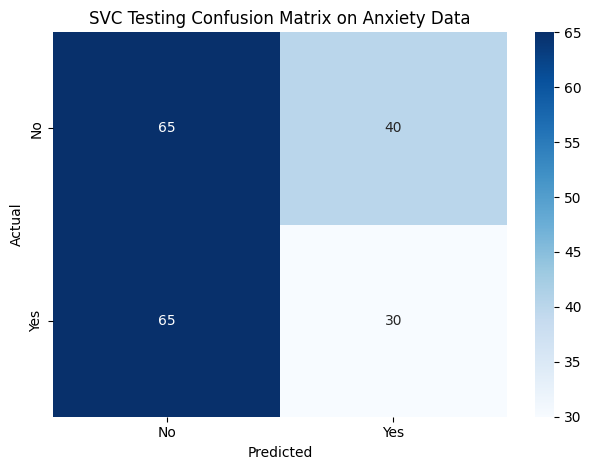

In [491]:
conf_matrix = confusion_matrix(y_test_anx, y_pred_svc)

# Create a single plot for the confusion matrix
plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)

# Set the title and labels
plt.title('SVC Testing Confusion Matrix on Anxiety Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

### KNN (Highest Score = 0.515)

In [493]:
pipe_knn = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier())
    ])

pipe_knn.fit(x_train_anx, y_train_anx)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'YearOfStudy',
                                                   'Depression', 'PanicAttack',
                                                   'SymptomFrequency_Last7Days',
                                                   'HasMentalHealthSupport',
                                                   'SleepQuality',
                                                   'StudyStressLevel',
                                                   'StudyHoursPerWeek',
                                                   'AcademicEngagement']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Course',
                                                   'CGPA_Range'])])),
                ('classifier', KNeighborsClassifier())])

In [495]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scorers
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
}

cv_results = cross_validate(pipe_knn, x_train_anx, y_train_anx, cv=cv, scoring=scoring, return_train_score=False)

print(f"--- KNN ---")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean F1 Score: {cv_results['test_f1'].mean():.3f}")

--- KNN ---
Mean Accuracy: 0.485
Mean F1 Score: 0.440


#### Hyperparameter Tuning for KNN (GridSearchCV)

In [498]:
#GridSearchCV

knn_param_grid = {
    'classifier__n_neighbors': list(range(3, 21, 2)),         
    'classifier__weights': ['uniform', 'distance'],           
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski'],  
    'classifier__p': [1, 2] 
}

grid_knn = GridSearchCV(pipe_knn, knn_param_grid, cv=cv, scoring=scoring, refit='accuracy', n_jobs=-1)
grid_knn.fit(x_train_anx, y_train_anx)

best_model = grid_knn.best_estimator_

# Re-run cross-validation on the best model
cv_results = cross_validate(best_model, x_train_anx, y_train_anx, cv=cv, scoring=scoring)

print(f"Best Params: {grid_knn.best_params_}")
print(f"Mean Accuracy (CV): {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean F1 Score (CV): {cv_results['test_f1'].mean():.3f}")
print(f"Best Score: {best_model.score(x_test_anx, y_test_anx):.3f}")

Best Params: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 15, 'classifier__p': 1, 'classifier__weights': 'distance'}
Mean Accuracy (CV): 0.545
Mean F1 Score (CV): 0.485
Best Score: 0.515


In [500]:
y_pred_knn = best_model.predict(x_test_anx)
print(classification_report(y_test_anx, y_pred_knn))

              precision    recall  f1-score   support

           0       0.54      0.58      0.56       105
           1       0.49      0.44      0.46        95

    accuracy                           0.52       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.51      0.52      0.51       200



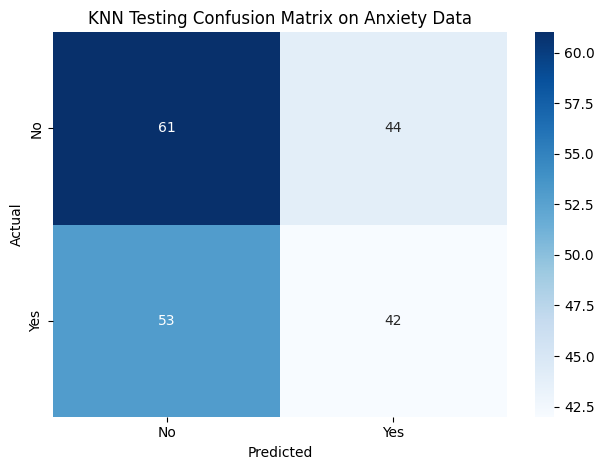

In [502]:
conf_matrix = confusion_matrix(y_test_anx, y_pred_knn)

# Create a single plot for the confusion matrix
plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)      

# Set the title and labels
plt.title('KNN Testing Confusion Matrix on Anxiety Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

## Predicting __PanicAttack__ Data

### Train-Test Split

In [504]:
x_panic = df.drop(['PanicAttack','CGPA'], axis=1)
y_panic = df['PanicAttack']
x_train_panic, x_test_panic, y_train_panic, y_test_panic = train_test_split(x_panic, y_panic, test_size=0.2, stratify=y_panic, random_state=42)

In [506]:
x_train_panic.head()

,Gender,Age,Course,YearOfStudy,Depression,Anxiety,SymptomFrequency_Last7Days,HasMentalHealthSupport,SleepQuality,StudyStressLevel,StudyHoursPerWeek,AcademicEngagement,CGPA_Range
537,Female,20,languageTeaching,3,1,0,3,0,1,1,7,3,0 - 2.5
889,Female,24,engineering,1,1,1,6,0,5,2,3,5,0 - 2.5
743,Female,24,engineering,1,0,1,1,0,2,2,1,3,0 - 2.5
204,Female,21,engineering,3,1,0,5,0,3,4,13,2,3.5 - 4.0
107,Female,21,math,4,1,1,3,0,5,4,14,4,3.5 - 4.0


### Processing Numerical and Categorical Features

In [509]:
numeric_features = x_train_panic.select_dtypes(include=['float64','int64']).columns.tolist()

cat_features = x_train_panic.select_dtypes(include=['object']).columns.tolist()

In [511]:
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [513]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, cat_features)
    ]
)

### __Random Forest Classifier (Highest Score = 0.580)__

In [516]:
pipe_rf = Pipeline(steps=[
        ('encoder', OrdinalEncoder()),
        ('classifier', RandomForestClassifier(random_state=42))
    ])

pipe_rf.fit(x_train_panic, y_train_panic)

Pipeline(steps=[('encoder', OrdinalEncoder()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [518]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scorers
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
}

cv_results = cross_validate(pipe_rf, x_train_panic, y_train_panic, cv=cv, scoring=scoring, return_train_score=False)

print(f"--- Random Forest ---")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean F1 Score: {cv_results['test_f1'].mean():.3f}\n")


--- Random Forest ---
Mean Accuracy: 0.520
Mean F1 Score: 0.384



#### Hyperparameter Tuning for Random Forest Classifier (RandomizedSearchCV)

In [520]:
rf_param_grid = {
    'classifier__n_estimators': [100, 200, 300], 
    'classifier__max_depth': [None, 5, 10, 15],  
    'classifier__min_samples_split': [2, 5, 10], 
    'classifier__min_samples_leaf': [1, 2, 4],  
    'classifier__max_features': ['sqrt', 'log2', None],  
    'classifier__bootstrap': [True, False],    
    'classifier__class_weight': [None, 'balanced'] 
}

random_rf = RandomizedSearchCV(pipe_rf, param_distributions=rf_param_grid, n_iter=100, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42)
random_rf.fit(x_train_panic, y_train_panic)

best_model = random_rf.best_estimator_

# Re-run cross-validation on the best model
cv_results = cross_validate(best_model, x_train_panic, y_train_panic, cv=cv, scoring=scoring)

print(f"Best Params: {random_rf.best_params_}")
print(f"Mean Accuracy (CV): {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean F1 Score (CV): {cv_results['test_f1'].mean():.3f}")
print(f"Best Score: {best_model.score(x_test_panic, y_test_panic):.3f}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Params: {'classifier__n_estimators': 300, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 5, 'classifier__class_weight': None, 'classifier__bootstrap': False}
Mean Accuracy (CV): 0.551
Mean F1 Score (CV): 0.362
Best Score: 0.550


In [522]:
importances = best_model.named_steps['classifier'].feature_importances_
pd.DataFrame({'feature': x_test_panic.columns, 'importance': importances}).sort_values(by='importance', ascending=False)

,feature,importance
2,Course,0.159142
1,Age,0.133155
10,StudyHoursPerWeek,0.103642
8,SleepQuality,0.103315
11,AcademicEngagement,0.098530
6,SymptomFrequency_Last7Days,0.098014
12,CGPA_Range,0.074423
9,StudyStressLevel,0.071350
3,YearOfStudy,0.044255
4,Depression,0.037126


In [526]:
#Dropping Gender and HasMentalHealthSupport
x_train_panic_modified_rf = x_train_panic.drop(['Gender','HasMentalHealthSupport'],axis=1)
x_test_panic_modified_rf = x_test_panic.drop(['Gender','HasMentalHealthSupport'],axis=1)

rf_param_grid = {
    'classifier__n_estimators': [100, 200, 300], 
    'classifier__max_depth': [None, 5, 10, 15],  
    'classifier__min_samples_split': [2, 5, 10], 
    'classifier__min_samples_leaf': [1, 2, 4],  
    'classifier__max_features': ['sqrt', 'log2', None],  
    'classifier__bootstrap': [True, False],    
    'classifier__class_weight': [None, 'balanced'] 
}

random_rf = RandomizedSearchCV(pipe_rf, param_distributions=rf_param_grid, n_iter=100, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42)
random_rf.fit(x_train_panic_modified_rf, y_train_panic)

best_model = random_rf.best_estimator_

# Re-run cross-validation on the best model
cv_results = cross_validate(best_model, x_train_panic_modified_rf, y_train_panic, cv=cv, scoring=scoring)

print(f"Best Params: {random_rf.best_params_}")
print(f"Mean Accuracy (CV): {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean F1 Score (CV): {cv_results['test_f1'].mean():.3f}")
print(f"Best Score: {best_model.score(x_test_panic_modified_rf, y_test_panic):.3f}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Params: {'classifier__n_estimators': 200, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 5, 'classifier__class_weight': None, 'classifier__bootstrap': False}
Mean Accuracy (CV): 0.560
Mean F1 Score (CV): 0.398
Best Score: 0.580


In [530]:
y_pred_rf = best_model.predict(x_test_panic_modified_rf)
print(classification_report(y_test_panic, y_pred_rf))

              precision    recall  f1-score   support

           0       0.58      0.79      0.67       108
           1       0.57      0.34      0.42        92

    accuracy                           0.58       200
   macro avg       0.58      0.56      0.55       200
weighted avg       0.58      0.58      0.56       200



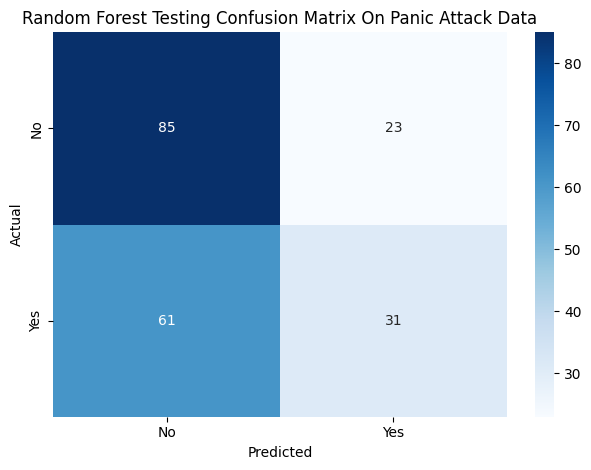

In [532]:
conf_matrix = confusion_matrix(y_test_panic, y_pred_rf)

plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)

plt.title('Random Forest Testing Confusion Matrix On Panic Attack Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

### Decision Tree Classifier (Highest Score = 0.565)

In [535]:
pipe_dt = Pipeline(steps=[
        ('encoder', OrdinalEncoder()),
        ('classifier', DecisionTreeClassifier(random_state=42))
    ])

pipe_dt.fit(x_train_panic, y_train_panic)

Pipeline(steps=[('encoder', OrdinalEncoder()),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [537]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scorers
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
}

cv_results = cross_validate(pipe_dt, x_train_panic, y_train_panic, cv=cv, scoring=scoring, return_train_score=False)

print(f"--- Decision Tree ---")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean F1 Score: {cv_results['test_f1'].mean():.3f}\n")


--- Decision Tree ---
Mean Accuracy: 0.491
Mean F1 Score: 0.450



#### Hyperparameter Tuning for Decision Tree Classifier (RandomizedSearchCV)

In [540]:
#RandomizedSearchCV

dt_param_grid = {
    'classifier__max_depth': [3, 5, 7, 10, 15, None],               
    'classifier__min_samples_split': [2, 5, 10],                 
    'classifier__min_samples_leaf': [1, 2, 4, 8],                
    'classifier__max_features': ['sqrt', 'log2', None],          
    'classifier__criterion': ['gini', 'entropy'],                
    'classifier__class_weight': [None, 'balanced'],             
    'classifier__splitter': ['best', 'random'], 
}

random_dt = RandomizedSearchCV(pipe_dt, param_distributions=dt_param_grid, n_iter=500, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42)
random_dt.fit(x_train_panic, y_train_panic)

best_model = random_dt.best_estimator_

# Re-run cross-validation on the best model
cv_results = cross_validate(best_model, x_train_panic, y_train_panic, cv=cv, scoring=scoring)

print(f"Best Params: {random_dt.best_params_}")
print(f"Mean Accuracy (CV): {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean F1 Score (CV): {cv_results['test_f1'].mean():.3f}")
print(f"Best Score: {best_model.score(x_test_panic, y_test_panic):.3f}")

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best Params: {'classifier__splitter': 'random', 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 2, 'classifier__max_features': None, 'classifier__max_depth': 15, 'classifier__criterion': 'entropy', 'classifier__class_weight': None}
Mean Accuracy (CV): 0.555
Mean F1 Score (CV): 0.481
Best Score: 0.490


In [542]:
importances = best_model.named_steps['classifier'].feature_importances_
pd.DataFrame({'feature': x_train_panic.columns, 'importance': importances}).sort_values(by='importance', ascending=False)

,feature,importance
6,SymptomFrequency_Last7Days,0.136485
1,Age,0.112380
11,AcademicEngagement,0.106800
10,StudyHoursPerWeek,0.105776
3,YearOfStudy,0.092416
2,Course,0.086246
9,StudyStressLevel,0.082013
0,Gender,0.078026
8,SleepQuality,0.076819
5,Anxiety,0.062415


In [544]:
#Dropping HasMentalHealthSupport
x_train_panic_modified = x_train_panic.drop(['HasMentalHealthSupport'], axis=1)
x_test_panic_modified = x_test_panic.drop(['HasMentalHealthSupport'], axis=1)

dt_param_grid = {
    'classifier__max_depth': [3, 5, 7, 10, 15, None],               
    'classifier__min_samples_split': [2, 5, 10],                 
    'classifier__min_samples_leaf': [1, 2, 4, 8],                
    'classifier__max_features': ['sqrt', 'log2', None],          
    'classifier__criterion': ['gini', 'entropy'],                
    'classifier__class_weight': [None, 'balanced'],             
    'classifier__splitter': ['best', 'random'], 
}

random_dt = RandomizedSearchCV(pipe_dt, param_distributions=dt_param_grid, n_iter=500, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42)
random_dt.fit(x_train_panic_modified, y_train_panic)

best_model = random_dt.best_estimator_

# Re-run cross-validation on the best model
cv_results = cross_validate(best_model, x_train_panic_modified, y_train_panic, cv=cv, scoring=scoring)

print(f"Best Params: {random_dt.best_params_}")
print(f"Mean Accuracy (CV): {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean F1 Score (CV): {cv_results['test_f1'].mean():.3f}")
print(f"Best Score: {best_model.score(x_test_panic_modified, y_test_panic):.3f}")

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best Params: {'classifier__splitter': 'best', 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 7, 'classifier__criterion': 'gini', 'classifier__class_weight': None}
Mean Accuracy (CV): 0.561
Mean F1 Score (CV): 0.439
Best Score: 0.565


In [546]:
y_pred_dt = best_model.predict(x_test_panic_modified)
print(classification_report(y_test_panic, y_pred_dt))

              precision    recall  f1-score   support

           0       0.59      0.67      0.62       108
           1       0.53      0.45      0.49        92

    accuracy                           0.56       200
   macro avg       0.56      0.56      0.55       200
weighted avg       0.56      0.56      0.56       200



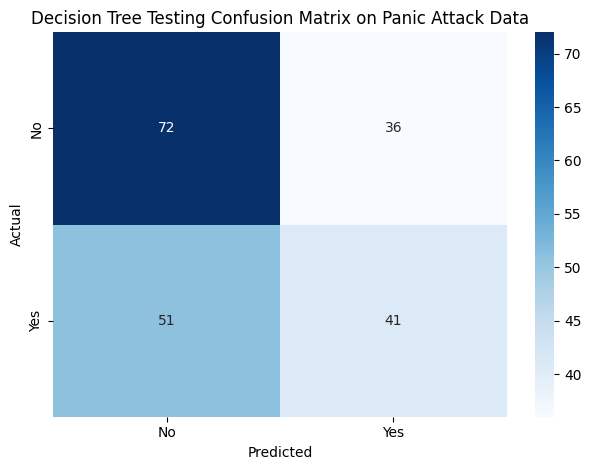

In [548]:
conf_matrix = confusion_matrix(y_test_panic, y_pred_dt)

# Create a single plot for the confusion matrix
plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)

# Set the title and labels
plt.title('Decision Tree Testing Confusion Matrix on Panic Attack Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

### XGBoost Classifier (Highest Score = 0.585)

In [550]:
pipe_xgb = Pipeline(steps=[
        ('encoder', OrdinalEncoder()),
        ('classifier', XGBClassifier(eval_metric='logloss', random_state=42))
    ])

pipe_xgb.fit(x_train_panic, y_train_panic)

Pipeline(steps=[('encoder', OrdinalEncoder()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [552]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scorers
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
}

cv_results = cross_validate(pipe_xgb, x_train_panic, y_train_panic, cv=cv, scoring=scoring, return_train_score=False)

print(f"--- XGBoost ---")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean F1 Score: {cv_results['test_f1'].mean():.3f}\n")


--- XGBoost ---
Mean Accuracy: 0.504
Mean F1 Score: 0.453



#### Hyperparameter Tuning for XGBoost Classifier (RandomizedSearchCV)

In [555]:
xgb_param_grid = {
    'classifier__max_depth': [100, 150, 200],
    'classifier__learning_rate': [0.03, 0.05, 0.06],
    'classifier__n_estimators': [150, 200, 250],
    'classifier__min_child_weight': [2, 3, 4],
    'classifier__scale_pos_weight': [0.2, 0.5, 0.8],
    'classifier__subsample': [0.8, 0.9, 1],  
    'classifier__colsample_bytree': [0.3, 0.5, 0.8],
    'classifier__colsample_bylevel': [0.7, 0.8, 0.9], 
    'classifier__reg_alpha': [0.01, 0.05, 0.1],  
    'classifier__reg_lambda': [0.05, 0.1, 0.2], 
    'classifier__max_delta_step': [1, 2, 3],    
    'classifier__gamma': [0, 0.1, 0.2]
}

random_xgb = RandomizedSearchCV(pipe_xgb, param_distributions=xgb_param_grid, n_iter=500, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42)
random_xgb.fit(x_train_panic, y_train_panic)

best_model = random_xgb.best_estimator_

# Re-run cross-validation on the best model
cv_results = cross_validate(best_model, x_train_panic, y_train_panic, cv=cv, scoring=scoring)

print(f"Best Params: {random_xgb.best_params_}")
print(f"Mean Accuracy (CV): {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean F1 Score (CV): {cv_results['test_f1'].mean():.3f}")
print(f"Best Score: {best_model.score(x_test_panic, y_test_panic):.3f}")

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best Params: {'classifier__subsample': 1, 'classifier__scale_pos_weight': 0.5, 'classifier__reg_lambda': 0.2, 'classifier__reg_alpha': 0.01, 'classifier__n_estimators': 250, 'classifier__min_child_weight': 2, 'classifier__max_depth': 150, 'classifier__max_delta_step': 2, 'classifier__learning_rate': 0.05, 'classifier__gamma': 0.1, 'classifier__colsample_bytree': 0.8, 'classifier__colsample_bylevel': 0.7}
Mean Accuracy (CV): 0.552
Mean F1 Score (CV): 0.306
Best Score: 0.550


In [559]:
importances = best_model.named_steps['classifier'].feature_importances_
pd.DataFrame({'feature': x_train_panic.columns, 'importance': importances}).sort_values(by='importance', ascending=False)

,feature,importance
11,AcademicEngagement,0.091271
8,SleepQuality,0.086728
12,CGPA_Range,0.084245
2,Course,0.082151
9,StudyStressLevel,0.080230
0,Gender,0.079193
6,SymptomFrequency_Last7Days,0.078347
10,StudyHoursPerWeek,0.076287
4,Depression,0.076096
5,Anxiety,0.075925


In [561]:
#Dropping Gender and HasMentalHealthSupport
x_train_panic_modified_xgb = x_train_panic.drop(['HasMentalHealthSupport','YearOfStudy'],axis=1)
x_test_panic_modified_xgb = x_test_panic.drop(['HasMentalHealthSupport','YearOfStudy'],axis=1)

xgb_param_grid = {
    'classifier__max_depth': [100, 150, 200],
    'classifier__learning_rate': [0.03, 0.05, 0.06],
    'classifier__n_estimators': [150, 200, 250],
    'classifier__min_child_weight': [2, 3, 4],
    'classifier__scale_pos_weight': [0.2, 0.5, 0.8],
    'classifier__subsample': [0.8, 0.9, 1],  
    'classifier__colsample_bytree': [0.3, 0.5, 0.8],
    'classifier__colsample_bylevel': [0.7, 0.8, 0.9], 
    'classifier__reg_alpha': [0.01, 0.05, 0.1],  
    'classifier__reg_lambda': [0.05, 0.1, 0.2], 
    'classifier__max_delta_step': [1, 2, 3],    
    'classifier__gamma': [0, 0.1, 0.2]
}

random_xgb = RandomizedSearchCV(pipe_xgb, param_distributions=xgb_param_grid, n_iter=500, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42)
random_xgb.fit(x_train_panic_modified_xgb, y_train_panic)

best_model = random_xgb.best_estimator_

# Re-run cross-validation on the best model
cv_results = cross_validate(best_model, x_train_panic_modified_xgb, y_train_panic, cv=cv, scoring=scoring)

print(f"Best Params: {random_xgb.best_params_}")
print(f"Mean Accuracy (CV): {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean F1 Score (CV): {cv_results['test_f1'].mean():.3f}")
print(f"Best Score: {best_model.score(x_test_panic_modified_xgb, y_test_panic):.3f}")

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best Params: {'classifier__subsample': 1, 'classifier__scale_pos_weight': 0.8, 'classifier__reg_lambda': 0.05, 'classifier__reg_alpha': 0.05, 'classifier__n_estimators': 150, 'classifier__min_child_weight': 4, 'classifier__max_depth': 150, 'classifier__max_delta_step': 1, 'classifier__learning_rate': 0.06, 'classifier__gamma': 0.2, 'classifier__colsample_bytree': 0.8, 'classifier__colsample_bylevel': 0.7}
Mean Accuracy (CV): 0.551
Mean F1 Score (CV): 0.388
Best Score: 0.585


In [567]:
y_pred_xgb = best_model.predict(x_test_panic_modified_xgb)
print(classification_report(y_test_panic, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.59      0.79      0.67       108
           1       0.58      0.35      0.44        92

    accuracy                           0.58       200
   macro avg       0.58      0.57      0.55       200
weighted avg       0.58      0.58      0.56       200



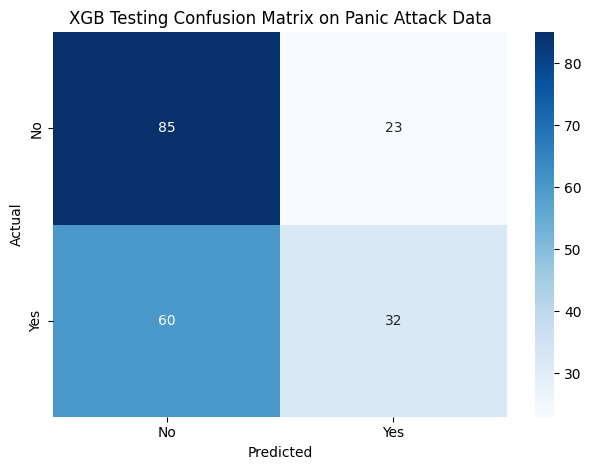

In [569]:
conf_matrix = confusion_matrix(y_test_panic, y_pred_xgb)

# Create a single plot for the confusion matrix
plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)

# Set the title and labels
plt.title('XGB Testing Confusion Matrix on Panic Attack Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

### Logistic Regression (Highest Score = 0.490)

In [571]:
pipe_lr = Pipeline(steps=[
        ('preprocessor', preprocessor),
       #('pca', PCA(n_components=5)),
        ('classifier', LogisticRegression(max_iter=1000, solver='liblinear', class_weight='balanced'))
    ])

pipe_lr.fit(x_train_panic, y_train_panic)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'YearOfStudy',
                                                   'Depression', 'Anxiety',
                                                   'SymptomFrequency_Last7Days',
                                                   'HasMentalHealthSupport',
                                                   'SleepQuality',
                                                   'StudyStressLevel',
                                                   'StudyHoursPerWeek',
                                                   'AcademicEngagement']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Course',
                                                   'CGPA_Range'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    solver='liblinear'))])

In [573]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scorers
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
}

cv_results = cross_validate(pipe_lr, x_train_panic, y_train_panic, cv=cv, scoring=scoring, return_train_score=False)

print(f"--- Logistic Regression ---")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean F1 Score: {cv_results['test_f1'].mean():.3f}")

--- Logistic Regression ---
Mean Accuracy: 0.486
Mean F1 Score: 0.470


#### Hyperparameter Tuning for Logistic Regression (GridSearchCV)

In [576]:
#GridSearchCV

lr_param_grid = {
    #'pca__n_components': [5, 8, 10, 12, 13],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': np.logspace(-4, 4, 20), 
    'classifier__solver': ['liblinear', 'saga'],
}

grid_lr = GridSearchCV(pipe_lr, lr_param_grid, cv=cv, scoring=scoring, refit='f1', n_jobs=-1)
grid_lr.fit(x_train_panic, y_train_panic)

best_model = grid_lr.best_estimator_

# Re-run cross-validation on the best model
cv_results = cross_validate(best_model, x_train_panic, y_train_panic, cv=cv, scoring=scoring)

print(f"Best Params: {grid_lr.best_params_}")
print(f"Mean Accuracy (CV): {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean F1 Score (CV): {cv_results['test_f1'].mean():.3f}")
print(f"Best Score: {best_model.score(x_test_panic, y_test_panic):.3f}")

Best Params: {'classifier__C': 0.08858667904100823, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Mean Accuracy (CV): 0.466
Mean F1 Score (CV): 0.508
Best Score: 0.490


In [577]:
y_pred_lr = best_model.predict(x_test_panic)
print(classification_report(y_test_panic, y_pred_lr))

              precision    recall  f1-score   support

           0       0.55      0.33      0.41       108
           1       0.46      0.67      0.55        92

    accuracy                           0.49       200
   macro avg       0.50      0.50      0.48       200
weighted avg       0.51      0.49      0.48       200



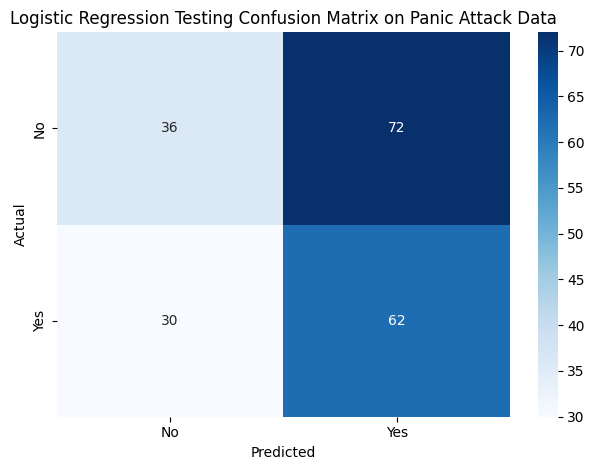

In [578]:
conf_matrix = confusion_matrix(y_test_panic, y_pred_lr)

# Create a single plot for the confusion matrix
plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)

# Set the title and labels
plt.title('Logistic Regression Testing Confusion Matrix on Panic Attack Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

### SVC (Highest Score = 0.500)

In [583]:
pipe_svc = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', SVC())
    ])

pipe_svc.fit(x_train_panic, y_train_panic)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'YearOfStudy',
                                                   'Depression', 'Anxiety',
                                                   'SymptomFrequency_Last7Days',
                                                   'HasMentalHealthSupport',
                                                   'SleepQuality',
                                                   'StudyStressLevel',
                                                   'StudyHoursPerWeek',
                                                   'AcademicEngagement']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Course',
                                                   'CGPA_Range'])])),
                ('classifier', SVC())])

In [585]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scorers
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
}

cv_results = cross_validate(pipe_svc, x_train_panic, y_train_panic, cv=cv, scoring=scoring, return_train_score=False)

print(f"--- SVC ---")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean F1 Score: {cv_results['test_f1'].mean():.3f}")

--- SVC ---
Mean Accuracy: 0.493
Mean F1 Score: 0.308


#### Hyperparameter Tuning for SVC (GridSearchCV)

In [588]:
#GridSearchCV

svc_param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'classifier__gamma': ['scale', 'auto'], 
    'classifier__degree': [2, 3, 4],         
    'classifier__probability': [True] 
}

grid_svc = GridSearchCV(pipe_svc, svc_param_grid, cv=cv, scoring=scoring, refit='f1', n_jobs=-1)
grid_svc.fit(x_train_panic, y_train_panic)

best_model = grid_svc.best_estimator_

# Re-run cross-validation on the best model
cv_results = cross_validate(best_model, x_train_panic, y_train_panic, cv=cv, scoring=scoring)

print(f"Best Params: {grid_svc.best_params_}")
print(f"Mean Accuracy (CV): {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean F1 Score (CV): {cv_results['test_f1'].mean():.3f}")
print(f"Best Score: {best_model.score(x_test_panic, y_test_panic):.3f}")

Best Params: {'classifier__C': 100, 'classifier__degree': 2, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf', 'classifier__probability': True}
Mean Accuracy (CV): 0.512
Mean F1 Score (CV): 0.467
Best Score: 0.500


In [589]:
y_pred_svc = best_model.predict(x_test_panic)
print(classification_report(y_test_panic, y_pred_svc))

              precision    recall  f1-score   support

           0       0.54      0.54      0.54       108
           1       0.46      0.46      0.46        92

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.50      0.50       200



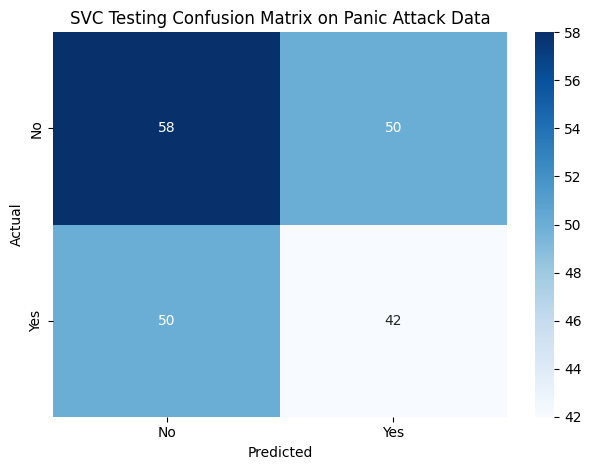

In [590]:
conf_matrix = confusion_matrix(y_test_panic, y_pred_svc)

# Create a single plot for the confusion matrix
plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)

# Set the title and labels
plt.title('SVC Testing Confusion Matrix on Panic Attack Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

### KNN (Highest Score = 0.515)

In [596]:
pipe_knn = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier())
    ])

pipe_knn.fit(x_train_panic, y_train_panic)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'YearOfStudy',
                                                   'Depression', 'Anxiety',
                                                   'SymptomFrequency_Last7Days',
                                                   'HasMentalHealthSupport',
                                                   'SleepQuality',
                                                   'StudyStressLevel',
                                                   'StudyHoursPerWeek',
                                                   'AcademicEngagement']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Course',
                                                   'CGPA_Range'])])),
                ('classifier', KNeighborsClassifier())])

In [598]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scorers
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
}

cv_results = cross_validate(pipe_knn, x_train_panic, y_train_panic, cv=cv, scoring=scoring, return_train_score=False)

print(f"--- KNN ---")
print(f"Mean Accuracy: {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean F1 Score: {cv_results['test_f1'].mean():.3f}")

--- KNN ---
Mean Accuracy: 0.514
Mean F1 Score: 0.425


#### Hyperparameter Tuning for KNN (GridSearchCV)

In [604]:
#GridSearchCV

knn_param_grid = {
    'classifier__n_neighbors': list(range(3, 21, 2)),         
    'classifier__weights': ['uniform', 'distance'],           
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski'],  
    'classifier__p': [1, 2] 
}

grid_knn = GridSearchCV(pipe_knn, knn_param_grid, cv=cv, scoring=scoring, refit='accuracy', n_jobs=-1)
grid_knn.fit(x_train_panic, y_train_panic)

best_model = grid_knn.best_estimator_

# Re-run cross-validation on the best model
cv_results = cross_validate(best_model, x_train_panic, y_train_panic, cv=cv, scoring=scoring)

print(f"Best Params: {grid_knn.best_params_}")
print(f"Mean Accuracy (CV): {cv_results['test_accuracy'].mean():.3f}")
print(f"Mean F1 Score (CV): {cv_results['test_f1'].mean():.3f}")
print(f"Best Score: {best_model.score(x_test_panic, y_test_panic):.3f}")

Best Params: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 7, 'classifier__p': 1, 'classifier__weights': 'uniform'}
Mean Accuracy (CV): 0.531
Mean F1 Score (CV): 0.458
Best Score: 0.495


In [605]:
y_pred_knn = best_model.predict(x_test_panic)
print(classification_report(y_test_panic, y_pred_knn))

              precision    recall  f1-score   support

           0       0.53      0.57      0.55       108
           1       0.45      0.40      0.42        92

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200



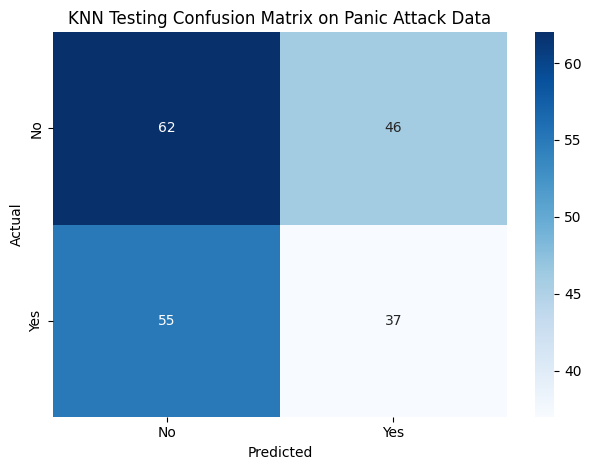

In [608]:
conf_matrix = confusion_matrix(y_test_panic, y_pred_knn)

# Create a single plot for the confusion matrix
plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)      

# Set the title and labels
plt.title('KNN Testing Confusion Matrix on Panic Attack Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

# Summary

Several machine learning models have been implemented to predict the mental health conditions of university students, namely __depression, anxiety,__ and __panic attacks__. The data has been collected, cleaned and pre-processed before being fit into each machine learning model. The models were then compared based on performance metrics.

## Model Comparison
- Tree-based models
  - Random Forest, Decision Tree, XGBoost
  - OrdinalEncoder was used for categorical features.
  - Feature importance was calculated, and the low-importance features were dropped before final training.
  - The hyperparameters was tuned using RandomizedSearchCV.
  - Achieved higher predictive performance than Non-tree-based models.
    

- Non-Tree Models
  - Logistic Regression, SVM, KNN
  - StandardScaler was used for numerical features while OneHotEncoder for categorical features.
  - Feature selection was not implemented.
  - The hyperparameters was tuned using GridSearchCV.
  - Achieved lower performance.



__Limitations__
- Feature selection was only applied to tree-based models, as GridSearchCV does not have a built-in feature importance output, possibly lowering their effectiveness.
- Tree-based models don't require standard scaling and handle ordinal-encoded categories well.

## Dataset Challenges and Limitations

- Mental health conditions like __depression, anxiety,__ and __panic attacks__ are highly complex and depend on multiple factors. They often depend on very specific factors that could be difficult to capture in query data, or many not manifest clearly through numerical or categorical features.
- The relatively low predictive scores of the models (with the highest models only achieveing around 0.58 accuracy) may indicate that the data itself does not hold enough discriminative power to distinguish mental health conditions effectively.
- Mental health is not easily predictable from standard survey data alone.